In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import MiniBatchKMeans
from minisom import MiniSom
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift

In [ ]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=2cb4e23131a5c3e5769e9d5a3bf74912be96078e79f0e54dcee65aa5ad8f627a
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load labels :

In [ ]:
x = np.load('stock.npz',allow_pickle=True)
labels = x['arr_0']
labels

array(['اخابر', 'اپال', 'بفجر', 'بوعلی', 'تاصیکو', 'تاپیکو', 'تیپیکو',
       'جم', 'جم پیلن', 'حکشتی', 'خبهمن', 'خزامیا', 'خساپا', 'خودرو',
       'خگستر', 'ذوب', 'رمپنا', 'شبریز', 'شبندر', 'شتران', 'شستا',
       'شپدیس', 'شپنا', 'پارس', 'پارسان', 'شیراز', 'فارس', 'فخوز', 'فملی',
       'فولاد', 'فولاژ', 'مبین', 'میدکو', 'نوری', 'همراه', 'وامید',
       'وبانک', 'وبصادر', 'وبملت', 'وتجارت', 'وصندوق', 'وغدیر', 'ومعادن',
       'وپارس', 'وپاسار', 'کالا', 'کاوه', 'کرماشا', 'کچاد', 'کگل'],
      dtype=object)

In [ ]:
EN_labels = np.array(['akhaber','opal','bi_fagr','booali','tasico','tapico','tipico','jam','jam_pilen',
                      'he_kashti','kh_bahman','kh_zamia','kh_sapa','khodro',
                      'kh_gostar','zob','rampna','sh_abriz','sh_bandar','sh_teran','shasta','shapdis','shapna',
                      'pars','parsan','shiraz','fars','fe_khooz',
                     'fe_meli','foolad','foolazh','mobin','midco','noori','hamrah','ve_omid',
                      've_bank','vebe_sader','vebe_melat','ve_tejarat','ve_sandoq','ve_ghadir',
                      've_maaden','ve_pars','ve_pasar','kala','kaveh','kermasha','ke_chad','ke_gol',
                      ])

In [ ]:
for i in range(50):
    print(labels[i],"    <>    ",EN_labels[i])

اخابر     <>     akhaber
اپال     <>     opal
بفجر     <>     bi_fagr
بوعلی     <>     booali
تاصیکو     <>     tasico
تاپیکو     <>     tapico
تیپیکو     <>     tipico
جم     <>     jam
جم پیلن     <>     jam_pilen
حکشتی     <>     he_kashti
خبهمن     <>     kh_bahman
خزامیا     <>     kh_zamia
خساپا     <>     kh_sapa
خودرو     <>     khodro
خگستر     <>     kh_gostar
ذوب     <>     zob
رمپنا     <>     rampna
شبریز     <>     sh_abriz
شبندر     <>     sh_bandar
شتران     <>     sh_teran
شستا     <>     shasta
شپدیس     <>     shapdis
شپنا     <>     shapna
پارس     <>     pars
پارسان     <>     parsan
شیراز     <>     shiraz
فارس     <>     fars
فخوز     <>     fe_khooz
فملی     <>     fe_meli
فولاد     <>     foolad
فولاژ     <>     foolazh
مبین     <>     mobin
میدکو     <>     midco
نوری     <>     noori
همراه     <>     hamrah
وامید     <>     ve_omid
وبانک     <>     ve_bank
وبصادر     <>     vebe_sader
وبملت     <>     vebe_melat
وتجارت     <>     ve_tejarat
وصندوق     <>     

In [ ]:
# np.save('EN_stock',EN_labels)
EN_labels = np.load('/content/drive/My Drive/Data/ProcessedData/Iran/EN_stock.npy')
EN_labels

array(['akhaber', 'opal', 'bi_fagr', 'booali', 'tasico', 'tapico',
       'tipico', 'jam', 'jam_pilen', 'he_kashti', 'kh_bahman', 'kh_zamia',
       'kh_sapa', 'khodro', 'kh_gostar', 'zob', 'rampna', 'sh_abriz',
       'sh_bandar', 'sh_teran', 'shasta', 'shapdis', 'shapna', 'pars',
       'parsan', 'shiraz', 'fars', 'fe_khooz', 'fe_meli', 'foolad',
       'foolazh', 'mobin', 'midco', 'noori', 'hamrah', 've_omid',
       've_bank', 'vebe_sader', 'vebe_melat', 've_tejarat', 've_sandoq',
       've_ghadir', 've_maaden', 've_pars', 've_pasar', 'kala', 'kaveh',
       'kermasha', 'ke_chad', 'ke_gol'], dtype='<U10')

### Load Datasets:

The following adjacency matrices have been obtained by applying 4 different algorithms on 50 Iranian stock markets.

In [ ]:
x = np.load('/content/drive/My Drive/Data/ProcessedData/Iran/adjacency matrices/adj1.npz')
adj_matrix1 = x['arr_0']
adj_matrix1 = adj_matrix1/adj_matrix1.max()
distance_matrix1 = np.exp(-adj_matrix1)

np.fill_diagonal(adj_matrix1,1)
np.fill_diagonal(distance_matrix1,0)

In [ ]:
#  adjacency matrix
x = np.load('/content/drive/My Drive/Data/ProcessedData/Iran/adjacency matrices/adj2.npz')
distance_matrix2 = x['arr_0']
distance_matrix2 = distance_matrix2/distance_matrix2.max()
adj_matrix2 = np.exp(-distance_matrix2)

np.fill_diagonal(adj_matrix2,1)
np.fill_diagonal(distance_matrix2,0)

In [ ]:
#  adjacency matrix
x = np.load('/content/drive/My Drive/Data/ProcessedData/Iran/adjacency matrices/adj3.npz')
distance_matrix3 = x['arr_0']
distance_matrix3 = distance_matrix3/distance_matrix3.max()
adj_matrix3 = np.exp(-distance_matrix3)

np.fill_diagonal(adj_matrix3,1)
np.fill_diagonal(distance_matrix3,0)

In [ ]:
#  adjacency matrix
x = np.load('/content/drive/My Drive/Data/ProcessedData/Iran/adjacency matrices/adj_DTW_dist.npy')
distance_matrix4 = x
distance_matrix4 = distance_matrix4/distance_matrix4.max()
adj_matrix4 = np.exp(-distance_matrix4)

np.fill_diagonal(adj_matrix4,1)
np.fill_diagonal(distance_matrix4,0)

# <a id='toc1_'></a>[Hierarchical clustering](#toc0_)

### <a id='toc1_1_1_'></a>[Dataset 1 :](#toc0_)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


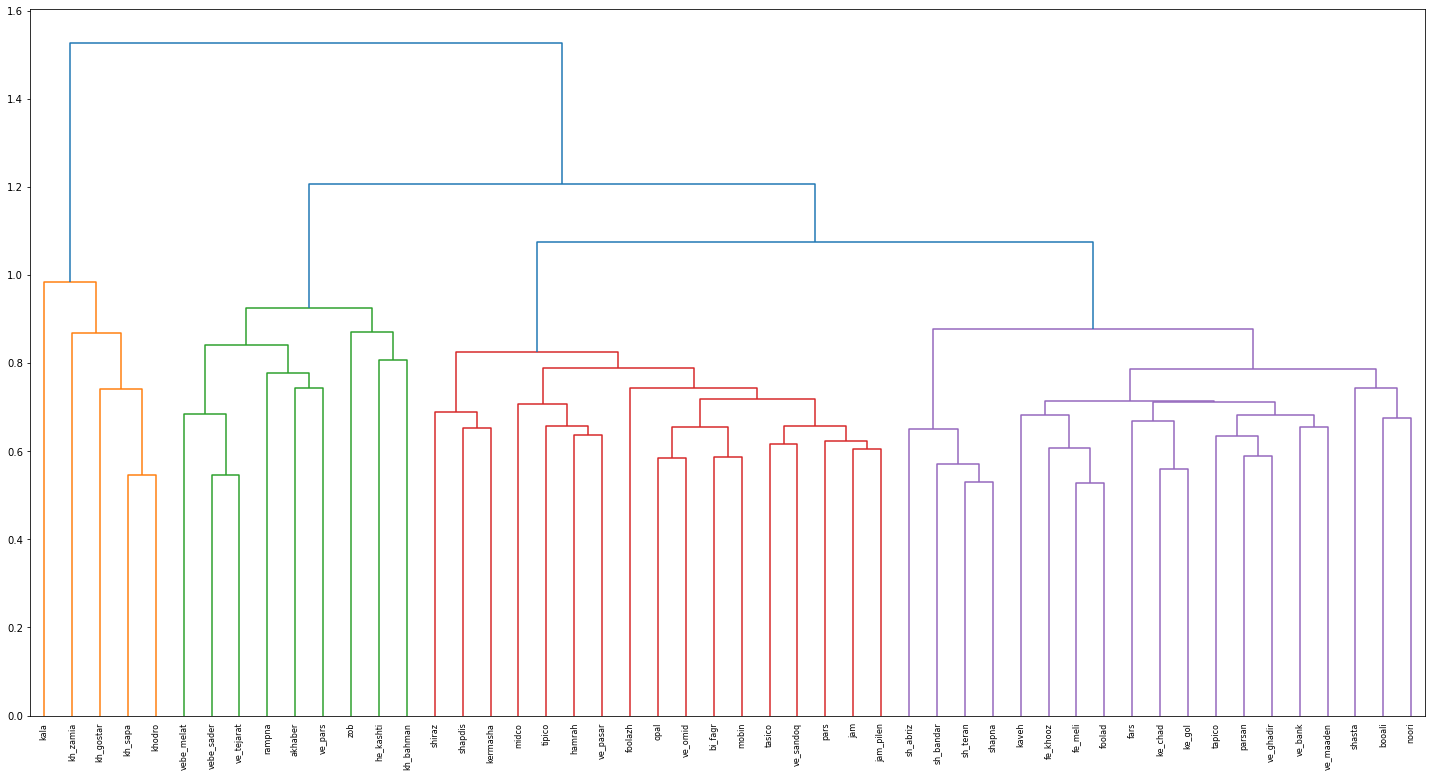

In [ ]:
#  hierarchical clustering
Z = linkage(distance_matrix1, method='complete')
plt.figure(figsize=(25,13))
# Generate dendrogram
dendrogram(Z,labels=EN_labels)

# Display the plot
plt.show();

In [ ]:
labels = cut_tree(Z, n_clusters=7)

In [ ]:
labels = labels.reshape(-1)

In [ ]:
labels

array([0, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 4, 4, 4, 4, 3, 0, 5, 5, 5, 2, 1,
       5, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       1, 6, 2, 1, 2, 2])

### <a id='toc1_1_2_'></a>[Dataset 2 :](#toc0_)

C:\Users\Hesam\AppData\Local\Temp\ipykernel_8340\2035143681.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix2, method='complete')


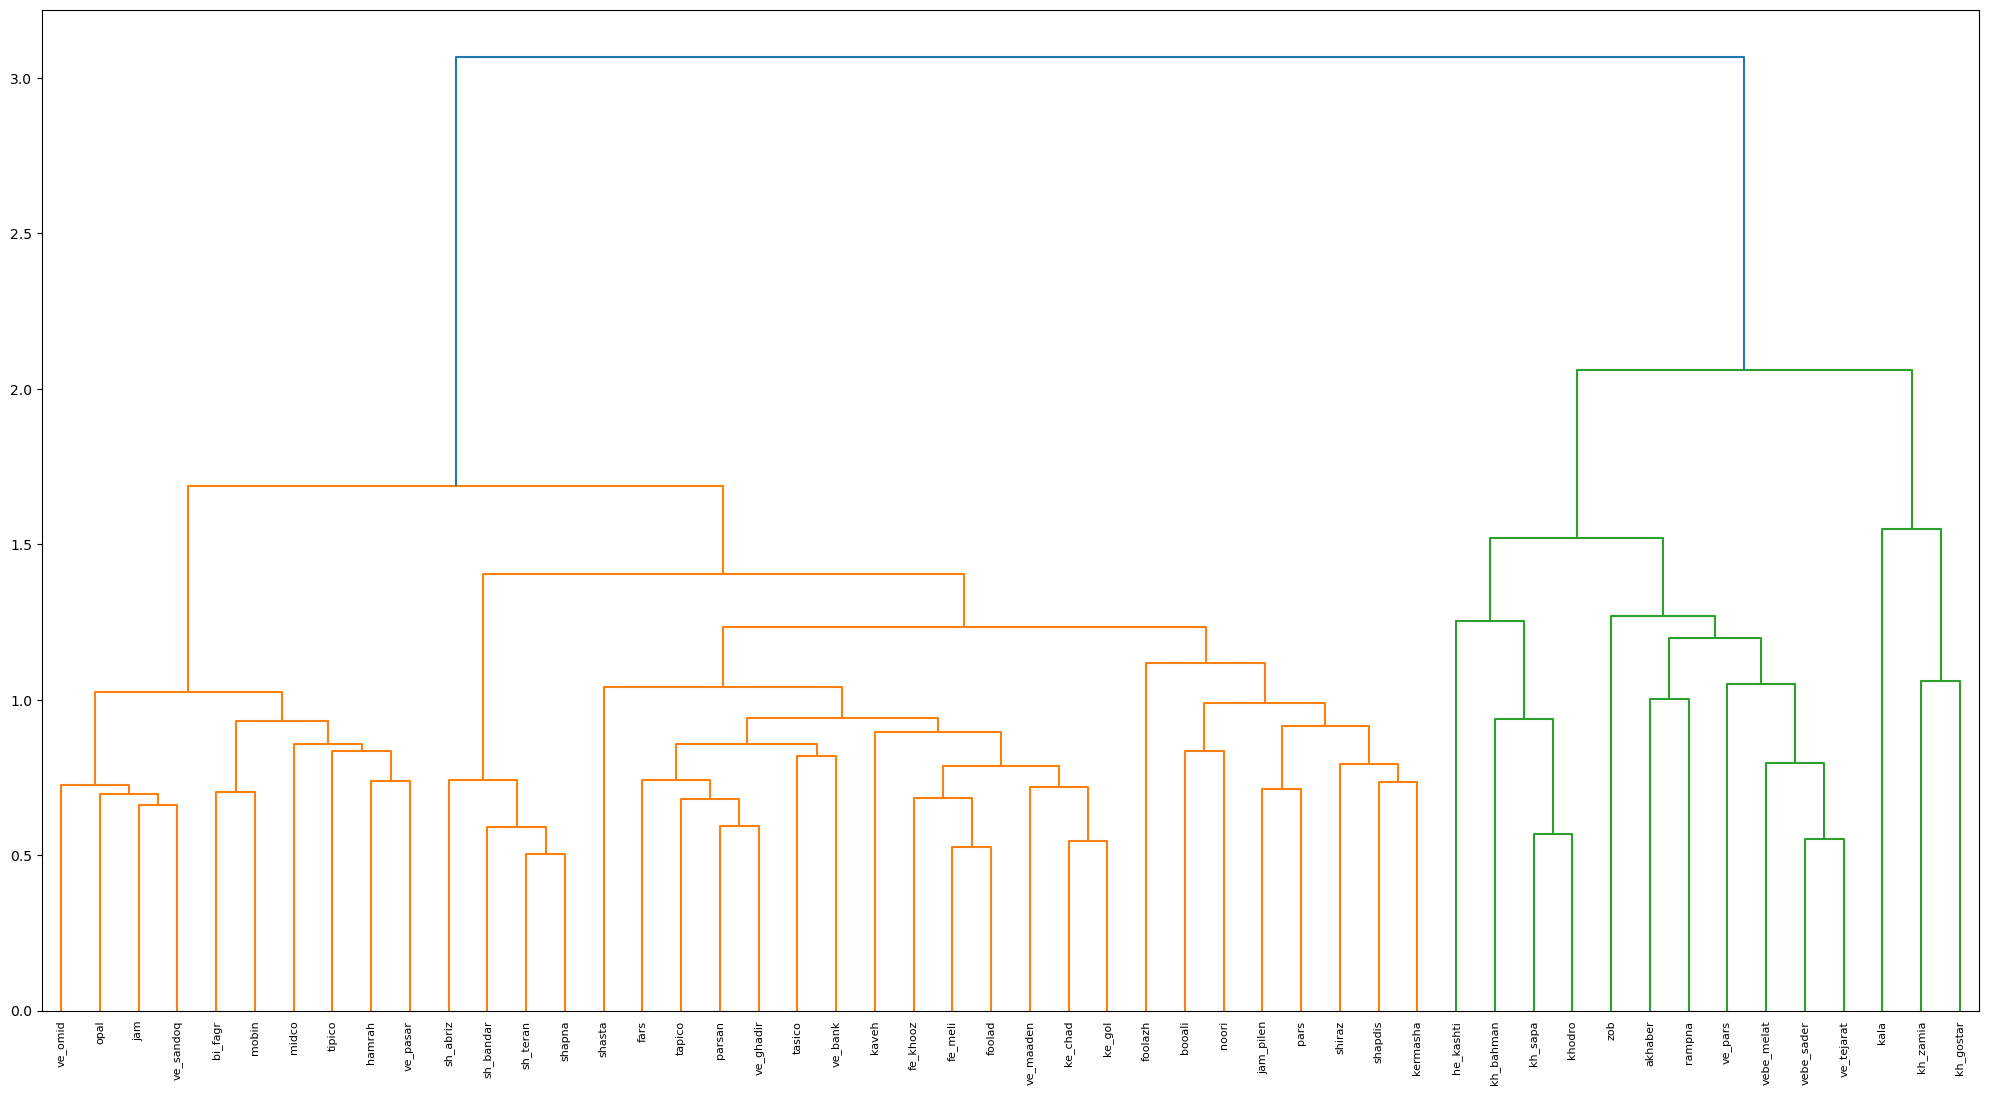

In [ ]:
#  hierarchical clustering
Z = linkage(distance_matrix2, method='complete')

plt.figure(figsize=(25,13))
# Generate dendrogram
dendrogram(Z,labels=EN_labels)

# Display the plot
plt.show();

### <a id='toc1_1_3_'></a>[Dataset 3 :](#toc0_)

C:\Users\Hesam\AppData\Local\Temp\ipykernel_8340\534396081.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix3, method='complete')


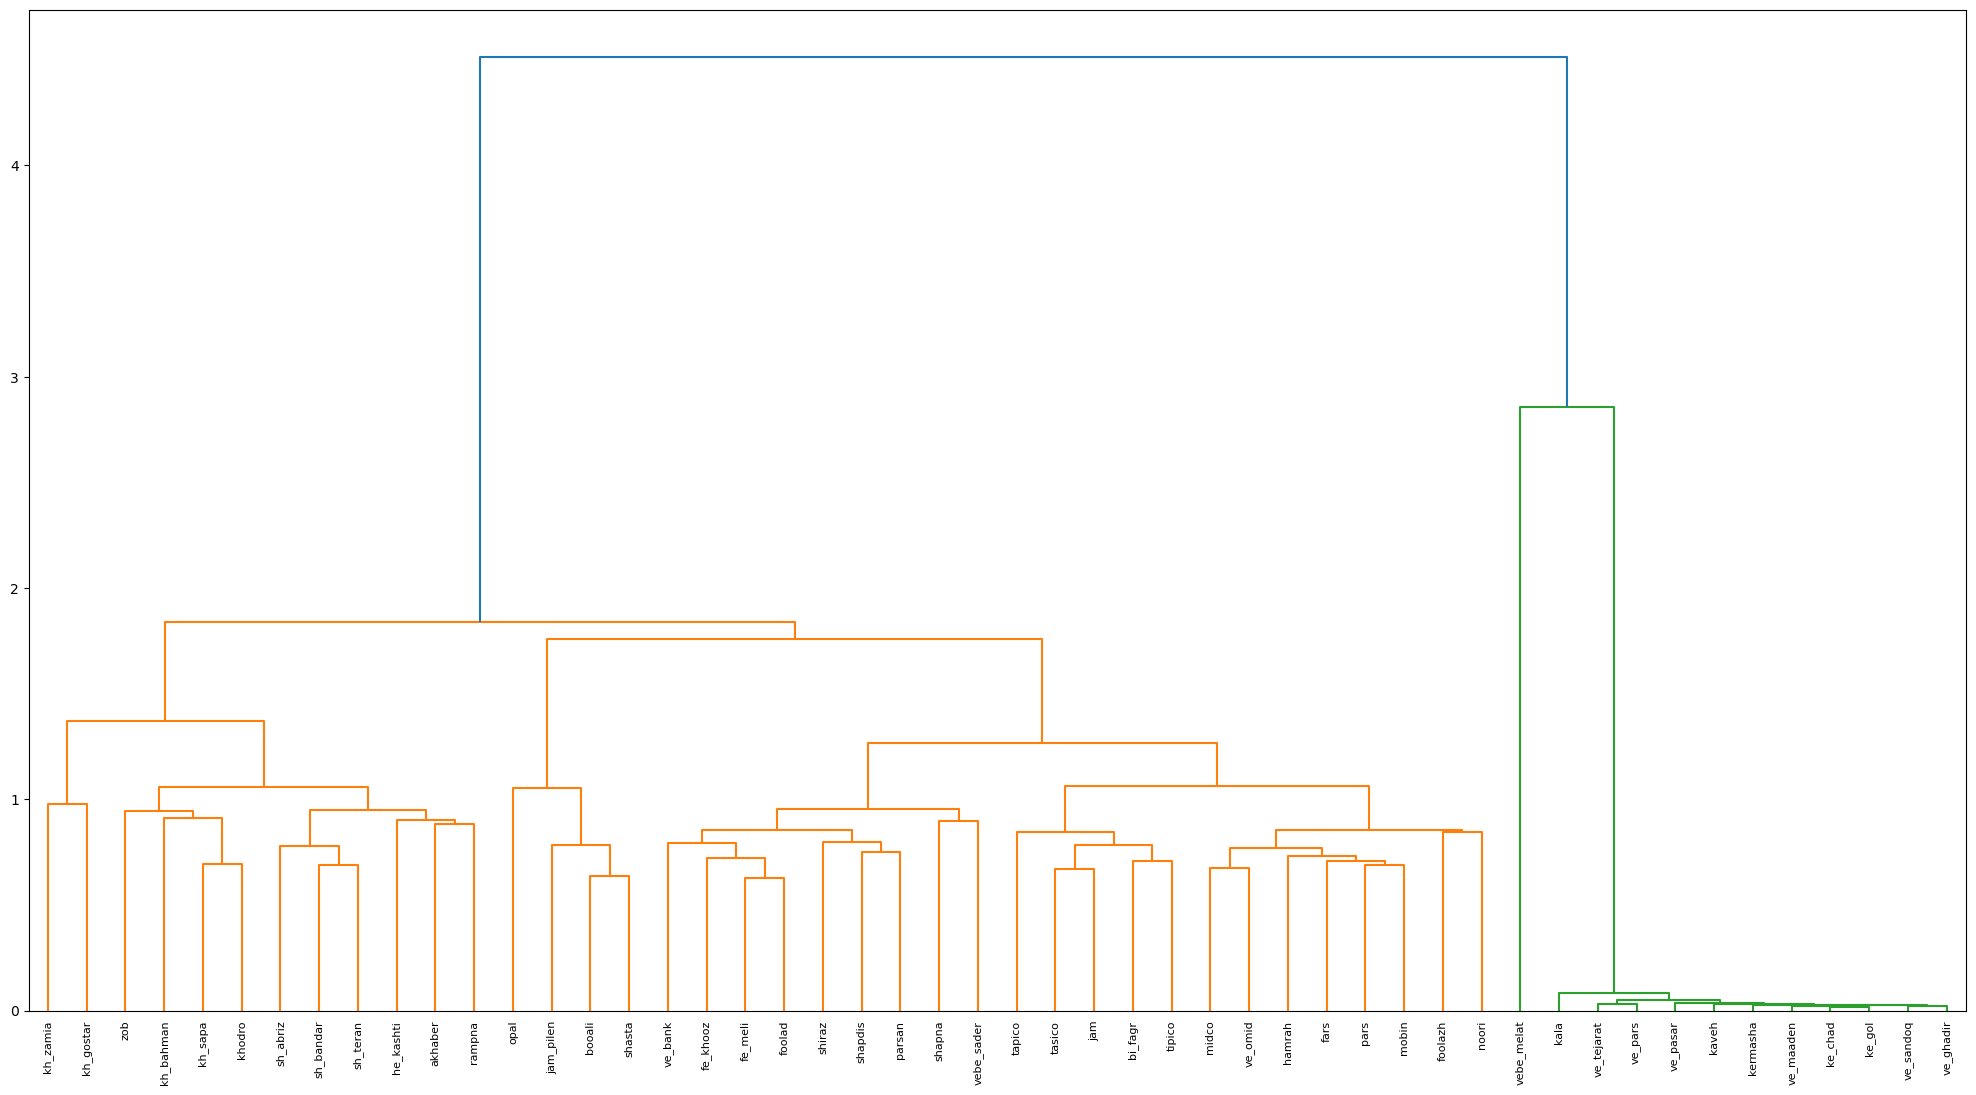

In [ ]:

Z = linkage(distance_matrix3, method='complete')
plt.figure(figsize=(25,13))
# Generate dendrogram
dendrogram(Z,labels=EN_labels)
plt.show();

### <a id='toc1_1_4_'></a>[Dataset 4 :](#toc0_)

C:\Users\Hesam\AppData\Local\Temp\ipykernel_8340\2135042759.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix4, method='complete')


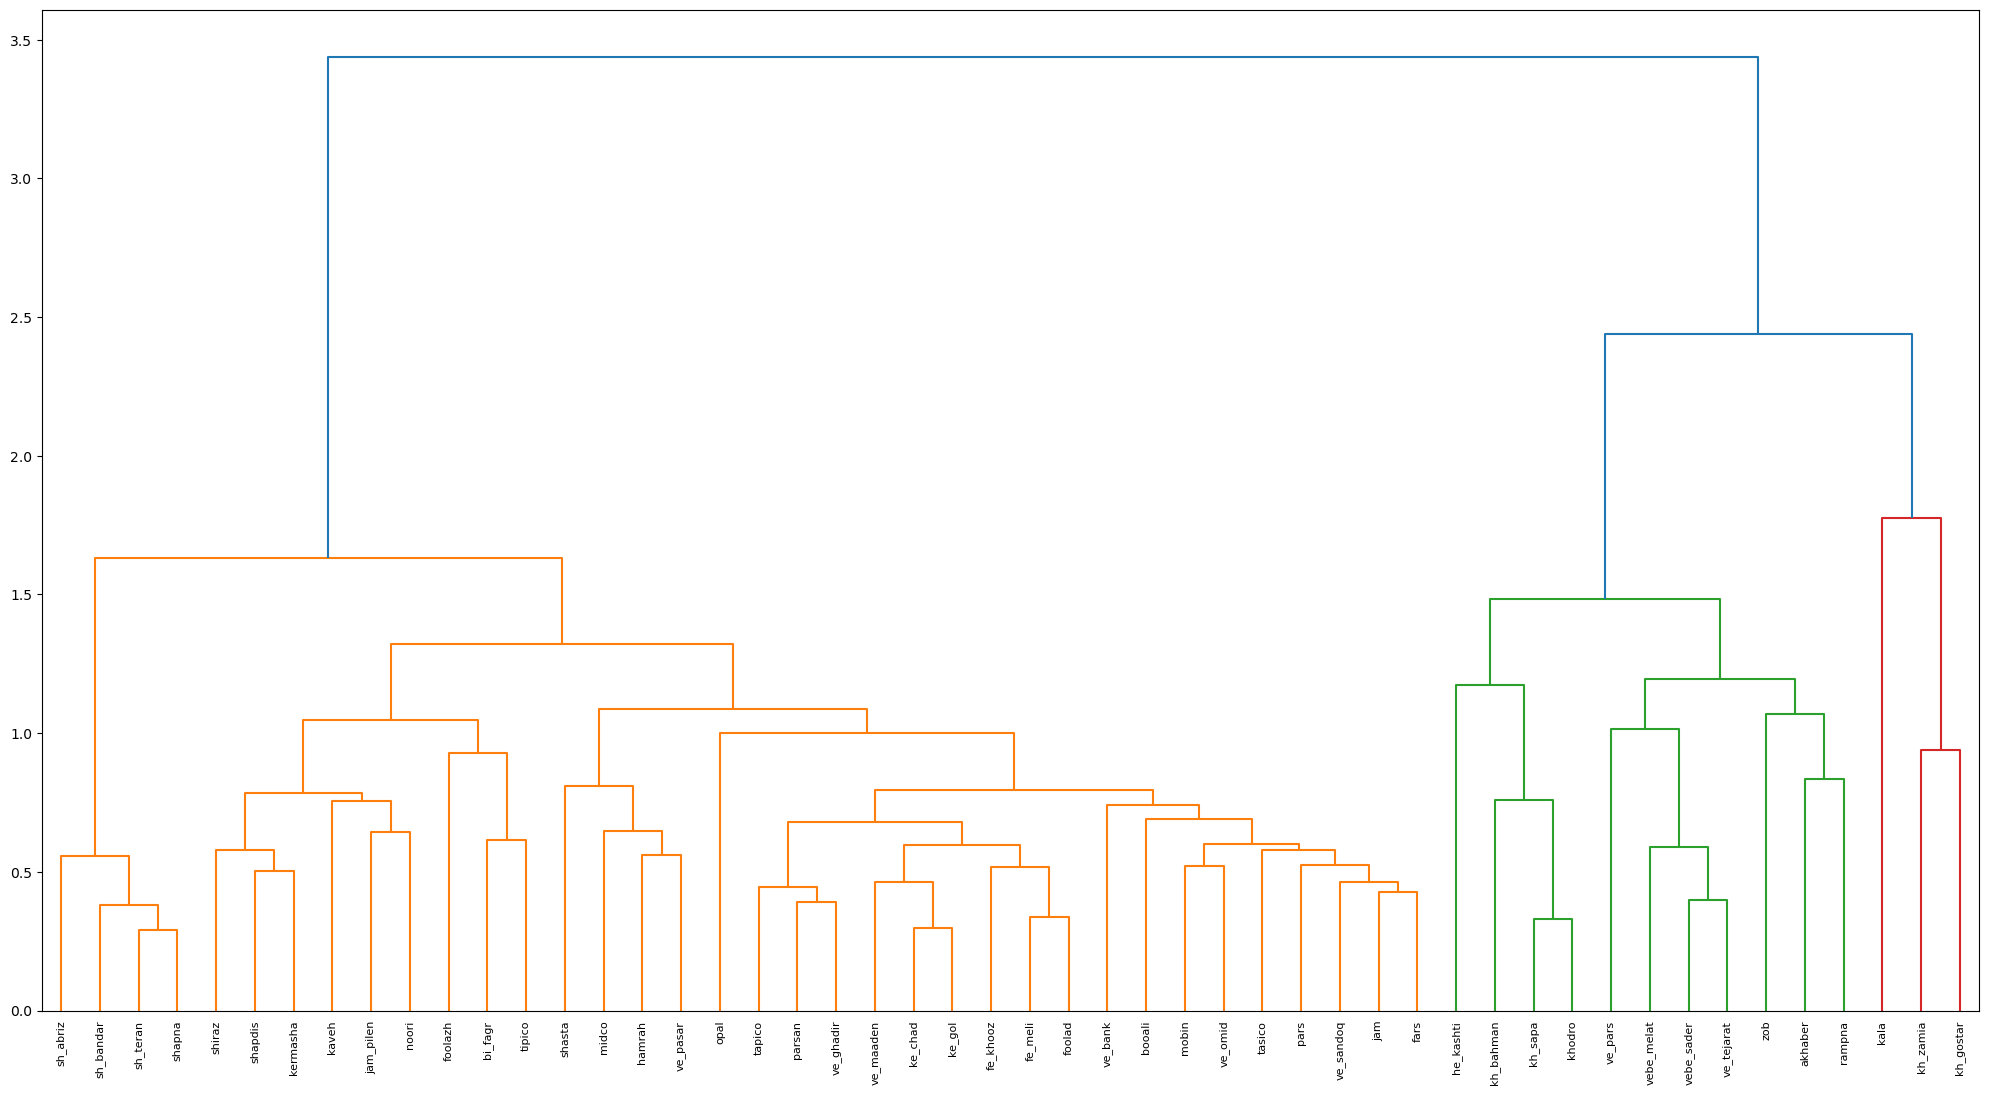

In [ ]:

Z = linkage(distance_matrix4, method='complete')
plt.figure(figsize=(25,13))
# Generate dendrogram
dendrogram(Z,labels=EN_labels)
plt.show();

In [ ]:
def Hierarchical_clustering(dist_mat):
    Z = linkage(dist_mat, method='complete')
    labels = cut_tree(Z, n_clusters=7)
    return labels.reshape(-1)

In [ ]:
Hierarchical_clustering(distance_matrix4)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


array([0, 1, 2, 1, 1, 1, 2, 1, 2, 3, 3, 4, 3, 3, 4, 0, 0, 5, 5, 5, 1, 2,
       5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 6, 2, 2, 1, 1])

---

# <a id='toc2_'></a>[Agglomerative clustering](#toc0_)

# <a id='toc3_'></a>[Dataset 1 :](#toc0_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = 7
# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
labels = clustering.fit_predict(distance_matrix1)
print(labels)

[0 1 1 4 1 4 1 1 1 0 3 3 3 3 3 5 0 4 4 4 4 1 4 1 4 1 4 4 4 4 1 1 1 4 1 1 4
 0 0 0 1 4 4 0 1 2 4 1 4 4]


In [ ]:
for i in range(cluster):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')


Cluste 0 :
['akhaber' 'he_kashti' 'rampna' 'vebe_sader' 'vebe_melat' 've_tejarat'
 've_pars'] 

Cluste 1 :
['opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'shapdis' 'pars'
 'shiraz' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 've_sandoq'
 've_pasar' 'kermasha'] 

Cluste 2 :
['kala'] 

Cluste 3 :
['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar'] 

Cluste 4 :
['booali' 'tapico' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shasta' 'shapna'
 'parsan' 'fars' 'fe_khooz' 'fe_meli' 'foolad' 'noori' 've_bank'
 've_ghadir' 've_maaden' 'kaveh' 'ke_chad' 'ke_gol'] 

Cluste 5 :
['zob'] 

Cluste 6 :
[] 



# <a id='toc4_'></a>[Dataset 2 :](#toc0_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = 7
# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
labels = clustering.fit_predict(distance_matrix2)
# print(labels)

In [ ]:
for i in range(cluster):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')


Cluste 0 :
['akhaber' 'he_kashti' 'rampna' 'hamrah' 'vebe_sader' 'vebe_melat'
 've_tejarat' 've_pars'] 

Cluste 1 :
['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar'] 

Cluste 2 :
['opal' 'bi_fagr' 'tipico' 'jam' 'jam_pilen' 'pars' 'foolazh' 'mobin'
 'midco' 've_omid' 've_sandoq' 've_pasar'] 

Cluste 3 :
['booali' 'tasico' 'tapico' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shasta'
 'shapdis' 'shapna' 'parsan' 'shiraz' 'fars' 'fe_khooz' 'fe_meli' 'foolad'
 'noori' 've_bank' 've_ghadir' 've_maaden' 'kaveh' 'kermasha' 'ke_chad'
 'ke_gol'] 

Cluste 4 :
['zob'] 

Cluste 5 :
['kala'] 

Cluste 6 :
[] 



# <a id='toc5_'></a>[Dataset 3 :](#toc0_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = 7
# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
labels = clustering.fit_predict(distance_matrix3)
# print(labels)

In [ ]:
for i in range(cluster):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')


Cluste 0 :
['kh_bahman' 'kh_sapa' 'khodro' 'kh_gostar'] 

Cluste 1 :
['bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'pars' 'fars' 'foolazh'
 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_pars' 've_pasar'] 

Cluste 2 :
['akhaber' 'tapico' 'he_kashti' 'rampna' 'sh_abriz' 'sh_bandar' 'sh_teran'
 'shapdis' 'shapna' 'parsan' 'shiraz' 'fe_khooz' 'fe_meli' 'foolad'
 've_bank' 'vebe_sader' 'vebe_melat' 've_tejarat' 've_ghadir' 've_maaden'
 'kaveh' 'kermasha' 'ke_chad' 'ke_gol'] 

Cluste 3 :
['opal' 'booali' 'shasta' 've_sandoq' 'kala'] 

Cluste 4 :
['zob'] 

Cluste 5 :
['kh_zamia'] 

Cluste 6 :
[] 



# <a id='toc6_'></a>[Dataset 4 :](#toc0_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
labels = clustering.fit_predict(distance_matrix4)
# print(labels)

In [ ]:
for i in range(cluster):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')


Cluste 0 :
['zob' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shapna'] 

Cluste 1 :
['akhaber' 'he_kashti' 'rampna' 'hamrah'] 

Cluste 2 :
['vebe_sader' 'vebe_melat' 've_tejarat' 've_pars'] 

Cluste 3 :
['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar'] 

Cluste 4 :
['opal' 'bi_fagr' 'booali' 'tasico' 'tapico' 'tipico' 'jam' 'jam_pilen'
 'shasta' 'shapdis' 'pars' 'parsan' 'shiraz' 'fars' 'fe_khooz' 'fe_meli'
 'foolad' 'foolazh' 'mobin' 'midco' 'noori' 've_omid' 've_bank'
 've_sandoq' 've_ghadir' 've_maaden' 've_pasar' 'kaveh' 'kermasha'
 'ke_chad' 'ke_gol'] 

Cluste 5 :
['kala'] 

Cluste 6 :
[] 



In [ ]:
def Agglomerative_clustering(dist_mat):

    # Perform agglomerative clustering
    clustering = AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='complete')
    labels = clustering.fit_predict(dist_mat)
    return labels

In [ ]:
Agglomerative_clustering(distance_matrix4)

array([0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 6, 0, 3, 3, 3, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 5, 4, 4, 4, 4])

---

# <a id='toc7_'></a>[OPTICS](#toc0_)

# <a id='toc8_'></a>[Dataset 1 :](#toc0_)

In [ ]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=0.001,p=2)

optics.fit(distance_matrix1)

labels = optics.labels_

labels = labels+1
print(labels)

[0 0 1 0 0 0 0 0 0 0 6 6 6 6 6 0 0 4 4 4 0 0 4 0 0 0 0 2 2 2 0 1 0 0 0 0 0
 5 5 5 0 0 0 0 0 0 0 0 3 3]


In [ ]:
for i in range(max(labels)+1):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')

Cluste 0 :
['akhaber' 'opal' 'booali' 'tasico' 'tapico' 'tipico' 'jam' 'jam_pilen'
 'he_kashti' 'zob' 'rampna' 'shasta' 'shapdis' 'pars' 'parsan' 'shiraz'
 'fars' 'foolazh' 'midco' 'noori' 'hamrah' 've_omid' 've_bank' 've_sandoq'
 've_ghadir' 've_maaden' 've_pars' 've_pasar' 'kala' 'kaveh' 'kermasha'] 

Cluste 1 :
['bi_fagr' 'mobin'] 

Cluste 2 :
['fe_khooz' 'fe_meli' 'foolad'] 

Cluste 3 :
['ke_chad' 'ke_gol'] 

Cluste 4 :
['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna'] 

Cluste 5 :
['vebe_sader' 'vebe_melat' 've_tejarat'] 

Cluste 6 :
['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar'] 



# <a id='toc9_'></a>[Dataset 2 :](#toc0_)

In [ ]:
optics = OPTICS(min_samples=0.001,p=2)

optics.fit(distance_matrix2)

labels = optics.labels_

labels = labels+1
print(labels)

[0 0 0 0 0 1 0 0 0 0 6 7 6 6 7 0 0 5 5 5 0 0 5 0 1 0 0 2 2 2 0 0 0 0 0 0 0
 4 4 4 0 1 3 0 0 0 0 0 3 3]


In [ ]:
for i in range(max(labels)+1):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')

Cluste 0 :
['akhaber' 'opal' 'bi_fagr' 'booali' 'tasico' 'tipico' 'jam' 'jam_pilen'
 'he_kashti' 'zob' 'rampna' 'shasta' 'shapdis' 'pars' 'shiraz' 'fars'
 'foolazh' 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_bank'
 've_sandoq' 've_pars' 've_pasar' 'kala' 'kaveh' 'kermasha'] 

Cluste 1 :
['tapico' 'parsan' 've_ghadir'] 

Cluste 2 :
['fe_khooz' 'fe_meli' 'foolad'] 

Cluste 3 :
['ve_maaden' 'ke_chad' 'ke_gol'] 

Cluste 4 :
['vebe_sader' 'vebe_melat' 've_tejarat'] 

Cluste 5 :
['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna'] 

Cluste 6 :
['kh_bahman' 'kh_sapa' 'khodro'] 

Cluste 7 :
['kh_zamia' 'kh_gostar'] 



# <a id='toc10_'></a>[Dataset 3 :](#toc0_)

In [ ]:
optics = OPTICS(min_samples=0.001,p=2)

optics.fit(distance_matrix3)

labels = optics.labels_

labels = labels+1

In [ ]:
for i in range(max(labels)+1):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')

Cluste 0 :
['akhaber' 'opal' 'tapico' 'jam_pilen' 'he_kashti' 'kh_zamia' 'kh_gostar'
 'zob' 'rampna' 'shapdis' 'shapna' 'parsan' 'shiraz' 'foolazh' 'noori'
 've_bank' 'vebe_sader' 'vebe_melat' 've_sandoq' 've_ghadir' 've_pasar'
 'kala' 'kaveh' 'kermasha'] 

Cluste 1 :
['sh_abriz' 'sh_bandar' 'sh_teran'] 

Cluste 2 :
['bi_fagr' 'tasico' 'tipico' 'jam'] 

Cluste 3 :
['booali' 'shasta'] 

Cluste 4 :
['pars' 'fars' 'mobin' 'midco' 'hamrah' 've_omid'] 

Cluste 5 :
['fe_khooz' 'fe_meli' 'foolad'] 

Cluste 6 :
['kh_bahman' 'kh_sapa' 'khodro'] 

Cluste 7 :
['ve_tejarat' 've_pars'] 

Cluste 8 :
['ve_maaden' 'ke_chad' 'ke_gol'] 



# <a id='toc11_'></a>[Dataset 4 :](#toc0_)

In [ ]:
optics = OPTICS(min_samples=0.001,p=2)

optics.fit(distance_matrix4)

labels = optics.labels_

labels = labels+1

In [ ]:
for i in range(max(labels)+1):
    print(f'Cluste {i} :')
    print(EN_labels[np.where(labels == i)[0]],'\n')

Cluste 0 :
['opal' 'booali' 'tasico' 'jam_pilen' 'he_kashti' 'zob' 'shasta' 'foolazh'
 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_bank' 've_pasar' 'kala'
 'kaveh'] 

Cluste 1 :
['akhaber' 'rampna'] 

Cluste 2 :
['bi_fagr' 'tipico'] 

Cluste 3 :
['jam' 'pars' 'fars' 've_sandoq'] 

Cluste 4 :
['tapico' 'parsan' 've_ghadir'] 

Cluste 5 :
['fe_khooz' 'fe_meli' 'foolad'] 

Cluste 6 :
['ve_maaden' 'ke_chad' 'ke_gol'] 

Cluste 7 :
['shapdis' 'shiraz' 'kermasha'] 

Cluste 8 :
['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna'] 

Cluste 9 :
['vebe_sader' 'vebe_melat' 've_tejarat' 've_pars'] 

Cluste 10 :
['kh_bahman' 'kh_sapa' 'khodro'] 

Cluste 11 :
['kh_zamia' 'kh_gostar'] 



In [ ]:
def OPTICS_clustering(dist_mat):

    optics = OPTICS(min_samples=0.001,p=2)

    optics.fit(dist_mat)

    labels = optics.labels_

    return labels+1

In [ ]:
OPTICS_clustering(distance_matrix4)

array([ 1,  0,  2,  0,  0,  4,  2,  3,  0,  0, 10, 11, 10, 10, 11,  0,  1,
        8,  8,  8,  0,  7,  8,  3,  4,  7,  3,  5,  5,  5,  0,  0,  0,  0,
        0,  0,  0,  9,  9,  9,  3,  4,  6,  9,  0,  0,  0,  7,  6,  6])

----

In [ ]:
#DBSCAN

# from sklearn.cluster import DBSCAN
# import numpy as np

# # Assuming you have an adjacency matrix stored in a variable called 'adjacency_matrix'
# # You can replace this with your actual adjacency matrix

# # Convert the adjacency matrix to a distance matrix
# distance_matrix = adj_matrix

# # Perform clustering using DBSCAN
# eps = 2.2#2.5  # Maximum distance between two samples to be considered as neighbors
# min_samples = 0.001  # Minimum number of samples in a neighborhood to be considered as a core point
# dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
# clusters = dbscan.fit_predict(distance_matrix)

# # Get the number of clusters
# num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# # Get the indices of the core samples
# core_samples_indices = dbscan.core_sample_indices_

# # Print the results
# print(f"Number of clusters: {num_clusters}")
# print(f"Core samples indices: {core_samples_indices}")
# print()

# for cluster_label in set(clusters):
#     if cluster_label == -1:
#         print("Noise points:")
#     else:
#         print(f"Cluster {cluster_label}:")
#     cluster_points = np.where(clusters == cluster_label)[0]
#     print(f"Data points: {cluster_points}")
#     print()

---

# <a id='toc12_'></a>[KMeans](#toc0_)

In [ ]:

from sklearn.cluster import KMeans

def my_KMeans(distance_matrix):
    distance_matrix = distance_matrix1

    k = 7  # Number of clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(distance_matrix)

    # Get the cluster labels for each node
    cluster_labels = kmeans.labels_

    # Print the results
    for i in range(k):
        cluster_points = [j for j, cluster in enumerate(cluster_labels) if cluster == i]
        print(f"Cluster {i+1}:")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()

dataset 1 :

In [ ]:
my_KMeans(distance_matrix1)

Cluster 1:
Data points: ['booali' 'shapdis' 'shiraz' 'kermasha']

Cluster 2:
Data points: ['kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'kala']

Cluster 3:
Data points: ['tapico' 'shasta' 'parsan' 'fars' 'fe_khooz' 'fe_meli' 'foolad' 'noori'
 've_bank' 've_ghadir' 've_maaden' 'kaveh' 'ke_chad' 'ke_gol']

Cluster 4:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 5:
Data points: ['he_kashti' 'kh_bahman' 'zob' 'vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 6:
Data points: ['akhaber' 'rampna' 'midco' 'hamrah' 've_pars' 've_pasar']

Cluster 7:
Data points: ['opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'pars' 'foolazh'
 'mobin' 've_omid' 've_sandoq']



In [ ]:
my_KMeans(distance_matrix2)

Cluster 1:
Data points: ['opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'pars' 'foolazh'
 'mobin' 'midco' 'hamrah' 've_omid' 've_sandoq' 've_pasar']

Cluster 2:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 3:
Data points: ['zob']

Cluster 4:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'kala']

Cluster 5:
Data points: ['shapdis' 'parsan' 'shiraz' 'noori' 'kermasha']

Cluster 6:
Data points: ['akhaber' 'he_kashti' 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars']

Cluster 7:
Data points: ['booali' 'tapico' 'rampna' 'shasta' 'fars' 'fe_khooz' 'fe_meli' 'foolad'
 've_bank' 've_ghadir' 've_maaden' 'kaveh' 'ke_chad' 'ke_gol']



In [ ]:
my_KMeans(distance_matrix3)

Cluster 1:
Data points: ['kala']

Cluster 2:
Data points: ['booali' 'tasico' 'tapico' 'shapdis' 'pars' 'parsan' 'shiraz' 'noori'
 've_bank' 'kermasha']

Cluster 3:
Data points: ['akhaber' 'he_kashti' 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars']

Cluster 4:
Data points: ['opal' 'bi_fagr' 'tipico' 'jam' 'jam_pilen' 'rampna' 'foolazh' 'mobin'
 'midco' 'hamrah' 've_omid' 've_sandoq' 've_pasar']

Cluster 5:
Data points: ['zob' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 6:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 7:
Data points: ['shasta' 'fars' 'fe_khooz' 'fe_meli' 'foolad' 've_ghadir' 've_maaden'
 'kaveh' 'ke_chad' 'ke_gol']



In [ ]:
my_KMeans(distance_matrix4)

Cluster 1:
Data points: ['booali' 'tasico' 'jam_pilen' 'pars' 'shiraz' 've_bank' 've_sandoq'
 've_maaden' 'kermasha' 'ke_chad' 'ke_gol']

Cluster 2:
Data points: ['kala']

Cluster 3:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 4:
Data points: ['akhaber' 'opal' 'bi_fagr' 'tipico' 'jam' 'rampna' 'foolazh' 'mobin'
 'midco' 'hamrah' 've_omid' 've_pasar']

Cluster 5:
Data points: ['tapico' 'shasta' 'shapdis' 'parsan' 'fars' 'fe_khooz' 'fe_meli' 'foolad'
 'noori' 've_ghadir' 'kaveh']

Cluster 6:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 7:
Data points: ['he_kashti' 'zob' 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars']



In [ ]:
def kmeans(dist_mat):

    k = 7  # Number of clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dist_mat)

    # Get the cluster labels for each node
    cluster_labels = kmeans.labels_
    return cluster_labels

In [ ]:
kmeans(distance_matrix4)

array([0, 6, 1, 6, 6, 6, 1, 6, 1, 5, 5, 2, 5, 5, 2, 0, 0, 3, 3, 3, 6, 1,
       3, 6, 6, 1, 6, 6, 6, 6, 1, 6, 6, 1, 6, 6, 6, 0, 0, 0, 6, 6, 6, 0,
       6, 4, 1, 1, 6, 6], dtype=int32)

---

## Mean Shift Clustering

In [ ]:
from sklearn.cluster import MeanShift

# Perform Mean Shift clustering
meanshift = MeanShift(max_iter=300)
clusters = meanshift.fit_predict(distance_matrix4)

# Print the results
for i in range(np.max(clusters) + 1):
    cluster_points = np.where(clusters == i)[0]
    print(f"Cluster {i+1}:")
    print(f"Data points: {EN_labels[cluster_points]}")
    print()

Cluster 1:
Data points: ['opal' 'bi_fagr' 'booali' 'tasico' 'tapico' 'tipico' 'jam' 'jam_pilen'
 'sh_abriz' 'sh_bandar' 'sh_teran' 'shasta' 'shapdis' 'shapna' 'pars'
 'parsan' 'shiraz' 'fars' 'fe_khooz' 'fe_meli' 'foolad' 'foolazh' 'mobin'
 'midco' 'noori' 'hamrah' 've_omid' 've_bank' 've_sandoq' 've_ghadir'
 've_maaden' 've_pasar' 'kaveh' 'kermasha' 'ke_chad' 'ke_gol']

Cluster 2:
Data points: ['akhaber' 'he_kashti' 'kh_bahman' 'kh_sapa' 'khodro' 'zob' 'rampna'
 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars']

Cluster 3:
Data points: ['kh_zamia' 'kh_gostar']

Cluster 4:
Data points: ['kala']



In [ ]:
def Meanshift_cls(dist_mat):

    # Perform Mean Shift clustering
    meanshift = MeanShift(max_iter=300)
    clusters = meanshift.fit_predict(dist_mat)

    return clusters

In [ ]:
Meanshift(distance_matrix4)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 3, 0, 0, 0, 0])

---

# <a id='toc13_'></a>[Spectral Clustering](#toc0_)

In [ ]:
from sklearn.cluster import SpectralClustering

def spec(adj_mat):
    # Perform spectral clustering
    k = 7 # Number of clusters
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed')
    clusters = spectral_clustering.fit_predict(adj_mat)

    # Print the results
    for i in range(k):
        cluster_points = [j for j, cluster in enumerate(clusters) if cluster == i]
        print(f"Cluster {i+1}:")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()

In [ ]:
spec(adj_matrix1)

Cluster 1:
Data points: ['booali' 'tapico' 'zob' 'shapdis' 'parsan' 'shiraz' 'noori' 've_ghadir'
 'kermasha']

Cluster 2:
Data points: ['opal' 'bi_fagr' 'tipico' 'jam' 'jam_pilen' 'pars' 'foolazh' 'mobin'
 'midco' 've_omid' 've_sandoq']

Cluster 3:
Data points: ['akhaber' 'he_kashti' 'rampna' 'hamrah' 've_pars' 've_pasar' 'kala']

Cluster 4:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 5:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 6:
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 7:
Data points: ['tasico' 'shasta' 'fars' 'fe_khooz' 'fe_meli' 'foolad' 've_bank'
 've_maaden' 'kaveh' 'ke_chad' 'ke_gol']



In [ ]:
spec(adj_matrix2)

Cluster 1:
Data points: ['akhaber' 'opal' 'bi_fagr' 'tipico' 'jam' 'rampna' 'foolazh' 'mobin'
 'midco' 'hamrah' 've_omid' 've_sandoq' 've_pars' 've_pasar']

Cluster 2:
Data points: ['tasico' 'fe_khooz' 'fe_meli' 'foolad' 've_maaden' 'kaveh' 'ke_chad'
 'ke_gol']

Cluster 3:
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 4:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 5:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 6:
Data points: ['booali' 'tapico' 'jam_pilen' 'shapdis' 'pars' 'parsan' 'shiraz' 'fars'
 'noori' 've_bank' 've_ghadir' 'kermasha']

Cluster 7:
Data points: ['he_kashti' 'zob' 'shasta' 'kala']



In [ ]:
spec(adj_matrix3)

Cluster 1:
Data points: ['tasico' 'tapico' 'parsan' 'fe_khooz' 'fe_meli' 'foolad']

Cluster 2:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 3:
Data points: ['pars' 'fars' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 'vebe_melat']

Cluster 4:
Data points: ['kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 5:
Data points: ['bi_fagr' 'tipico' 'jam']

Cluster 6:
Data points: ['opal' 'booali' 'jam_pilen' 'shasta' 'noori']

Cluster 7:
Data points: ['akhaber' 'he_kashti' 'kh_bahman' 'zob' 'rampna' 'shapdis' 'shiraz'
 've_bank' 'vebe_sader' 've_tejarat' 've_sandoq' 've_ghadir' 've_maaden'
 've_pars' 've_pasar' 'kala' 'kaveh' 'kermasha' 'ke_chad' 'ke_gol']



In [ ]:
spec(adj_matrix4)

Cluster 1:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 2:
Data points: ['akhaber' 'opal' 'bi_fagr' 'tipico' 'he_kashti' 'rampna' 'mobin' 'midco'
 'hamrah' 've_omid' 've_sandoq' 've_pars' 've_pasar']

Cluster 3:
Data points: ['booali' 'jam_pilen' 'shasta' 'noori' 'kala']

Cluster 4:
Data points: ['tasico' 'zob' 'fe_khooz' 'fe_meli' 'foolad' 'foolazh' 've_maaden'
 'kaveh' 'ke_chad' 'ke_gol']

Cluster 5:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 6:
Data points: ['tapico' 'jam' 'shapdis' 'pars' 'parsan' 'shiraz' 'fars' 've_bank'
 've_ghadir' 'kermasha']

Cluster 7:
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']



In [ ]:
def Spectral_Clustering(adj_mat):
    # Perform spectral clustering
    k = 7 # Number of clusters
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed')
    clusters = spectral_clustering.fit_predict(adj_mat)
    return clusters


In [ ]:
Spectral_Clustering(adj_matrix1)

array([1, 6, 6, 4, 2, 4, 6, 6, 6, 1, 3, 3, 3, 3, 3, 4, 1, 0, 0, 0, 2, 4,
       0, 6, 4, 4, 2, 2, 2, 2, 6, 6, 6, 4, 1, 6, 2, 5, 5, 5, 6, 4, 2, 1,
       1, 1, 2, 4, 2, 2], dtype=int32)

---

# <a id='toc14_'></a>[Affinity Propagation](#toc0_)

In [ ]:
from sklearn.cluster import AffinityPropagation
def aff(adj_mat,damp=0.6):
    # Perform clustering using Affinity Propagation
    aff_prop = AffinityPropagation(damping=damp,affinity='precomputed')
    clusters = aff_prop.fit_predict(adj_mat)

    # Get the cluster centers
    cluster_centers = aff_prop.cluster_centers_indices_

    # Print the results
    for i, center in enumerate(cluster_centers):
        cluster_points = np.where(clusters == i)[0]
        print(f"Cluster {i+1}:")
        print(f"Center: {center}")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()


In [ ]:
aff(adj_matrix1)

Cluster 1:
Center: 1
Data points: ['akhaber' 'opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'rampna'
 'pars' 'shiraz' 'fars' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid'
 've_sandoq' 've_pars' 've_pasar' 'kaveh' 'ke_chad']

Cluster 2:
Center: 9
Data points: ['he_kashti']

Cluster 3:
Center: 11
Data points: ['kh_zamia']

Cluster 4:
Center: 13
Data points: ['kh_bahman' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 5:
Center: 22
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 6:
Center: 29
Data points: ['fe_khooz' 'fe_meli' 'foolad' 'ke_gol']

Cluster 7:
Center: 39
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 8:
Center: 41
Data points: ['booali' 'tapico' 'zob' 'shasta' 'shapdis' 'parsan' 'noori' 've_bank'
 've_ghadir' 've_maaden' 'kermasha']

Cluster 9:
Center: 45
Data points: ['kala']



In [ ]:
aff(adj_matrix2)

Cluster 1:
Center: 0
Data points: ['akhaber']

Cluster 2:
Center: 1
Data points: ['opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'jam_pilen' 'rampna' 'pars'
 'shiraz' 'fars' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 've_sandoq'
 've_pars' 've_pasar' 'kermasha' 'ke_chad' 'ke_gol']

Cluster 3:
Center: 9
Data points: ['he_kashti']

Cluster 4:
Center: 11
Data points: ['kh_zamia']

Cluster 5:
Center: 13
Data points: ['kh_bahman' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 6:
Center: 22
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 7:
Center: 29
Data points: ['zob' 'fe_khooz' 'fe_meli' 'foolad' 'noori' 've_maaden' 'kaveh']

Cluster 8:
Center: 39
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 9:
Center: 41
Data points: ['booali' 'tapico' 'shasta' 'shapdis' 'parsan' 've_bank' 've_ghadir']

Cluster 10:
Center: 45
Data points: ['kala']



In [ ]:
aff(adj_matrix3)

Cluster 1:
Center: 40
Data points: ['akhaber' 'opal' 'bi_fagr' 'booali' 'tasico' 'tapico' 'tipico' 'jam'
 'jam_pilen' 'he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro'
 'kh_gostar' 'zob' 'rampna' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shasta'
 'shapdis' 'shapna' 'pars' 'parsan' 'shiraz' 'fars' 'fe_khooz' 'fe_meli'
 'foolad' 'foolazh' 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_bank'
 'vebe_sader' 'vebe_melat' 've_tejarat' 've_sandoq' 've_ghadir'
 've_maaden' 've_pars' 've_pasar' 'kala' 'kaveh' 'kermasha' 'ke_chad'
 'ke_gol']



In [ ]:
aff(adj_matrix4)

Cluster 1:
Center: 0
Data points: ['akhaber']

Cluster 2:
Center: 1
Data points: ['opal' 'bi_fagr' 'booali' 'tasico' 'tipico' 'jam' 'jam_pilen' 'rampna'
 'shasta' 'pars' 'fars' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid'
 've_sandoq' 've_pars' 've_pasar' 'kermasha' 'ke_chad']

Cluster 3:
Center: 9
Data points: ['he_kashti']

Cluster 4:
Center: 11
Data points: ['kh_zamia']

Cluster 5:
Center: 13
Data points: ['kh_bahman' 'kh_sapa' 'khodro' 'kh_gostar']

Cluster 6:
Center: 22
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 7:
Center: 29
Data points: ['zob' 'fe_khooz' 'fe_meli' 'foolad' 'noori' 've_maaden' 'kaveh' 'ke_gol']

Cluster 8:
Center: 39
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 9:
Center: 41
Data points: ['tapico' 'shapdis' 'parsan' 'shiraz' 've_bank' 've_ghadir']

Cluster 10:
Center: 45
Data points: ['kala']



In [ ]:
def Affinity_Propagation(adj_mat,damp=0.6):
    # Perform clustering using Affinity Propagation
    aff_prop = AffinityPropagation(damping=damp,affinity='precomputed')
    clusters = aff_prop.fit_predict(adj_mat)

    # Get the cluster centers
    cluster_centers = aff_prop.cluster_centers_indices_

        # Print the results
    labelss = [0 for _ in range(50)]

    for i, center in enumerate(cluster_centers):
        cluster_points = np.where(clusters == i)[0]

        for j in cluster_points:
            labelss[j] = i
    return np.array(labelss)


In [ ]:
Affinity_Propagation(adj_matrix1)

array([0, 0, 0, 7, 0, 7, 0, 0, 0, 1, 3, 2, 3, 3, 3, 7, 0, 4, 4, 4, 7, 7,
       4, 0, 7, 0, 0, 5, 5, 5, 0, 0, 0, 7, 0, 0, 7, 6, 6, 6, 0, 7, 7, 0,
       0, 8, 0, 7, 0, 5])

---

# <a id='toc15_'></a>[Birch](#toc0_)

In [ ]:
from sklearn.cluster import Birch

def my_birch(adj_mat):

    # Create a Birch clustering object
    num_clusters = 7
    birch = Birch(n_clusters=num_clusters)  # Set n_clusters to None for automatic determination of the number of clusters

    # Fit the adjacency matrix to the Birch clustering model
    clusters = birch.fit_predict(adj_mat)

    # Print the cluster labels for each node
    for  i in range(num_clusters):
        # print(f"Node {node}: Cluster {cluster_label}")
        cluster_points = np.where(clusters == i)
        print(f"Cluster {i+1}:")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()


In [ ]:
my_birch(adj_matrix1)

Cluster 1:
Data points: ['booali' 'tasico' 'tapico' 'jam' 'parsan' 'fars' 'fe_khooz' 'fe_meli'
 've_bank' 've_ghadir' 'ke_gol']

Cluster 2:
Data points: ['akhaber' 'he_kashti' 'kh_bahman' 'zob' 'rampna' 'sh_abriz' 'sh_bandar'
 'sh_teran' 'noori' 'vebe_melat' 've_tejarat' 've_pars']

Cluster 3:
Data points: ['kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'kala']

Cluster 4:
Data points: ['opal']

Cluster 5:
Data points: ['bi_fagr' 'tipico' 'jam_pilen' 'shasta' 'shapdis' 'pars' 'shiraz'
 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 've_maaden' 've_pasar'
 'kaveh' 'kermasha' 'ke_chad']

Cluster 6:
Data points: ['foolad' 've_sandoq']

Cluster 7:
Data points: ['shapna' 'vebe_sader']



In [ ]:
my_birch(adj_matrix4)

Cluster 1:
Data points: ['kala']

Cluster 2:
Data points: ['ve_pars']

Cluster 3:
Data points: ['rampna' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 4:
Data points: ['kh_zamia' 'kh_gostar']

Cluster 5:
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 6:
Data points: ['opal' 'bi_fagr' 'booali' 'tasico' 'tapico' 'tipico' 'jam' 'jam_pilen'
 'shasta' 'shapdis' 'pars' 'parsan' 'shiraz' 'fars' 'fe_khooz' 'fe_meli'
 'foolad' 'foolazh' 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_bank'
 've_sandoq' 've_ghadir' 've_maaden' 've_pasar' 'kaveh' 'kermasha'
 'ke_chad' 'ke_gol']

Cluster 7:
Data points: ['akhaber' 'he_kashti' 'kh_bahman' 'kh_sapa' 'khodro' 'zob']



In [ ]:
def Birch_clustering(adj_mat):

    # Create a Birch clustering object
    num_clusters = 7
    birch = Birch(n_clusters=num_clusters)  # Set n_clusters to None for automatic determination of the number of clusters

    # Fit the adjacency matrix to the Birch clustering model
    clusters = birch.fit_predict(adj_mat)
    return clusters


In [ ]:
Birch_clustering(adj_matrix1)

array([1, 3, 4, 0, 0, 0, 4, 0, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4,
       6, 4, 0, 4, 0, 0, 0, 5, 4, 4, 4, 1, 4, 4, 0, 6, 1, 1, 5, 0, 4, 1,
       4, 2, 4, 4, 4, 0])

---

## <a id='toc15_1_'></a>[Gaussian Mixture Method](#toc0_)

In [ ]:
from sklearn.mixture import GaussianMixture

def GM(adj_mat):
    gmm = GaussianMixture(n_components=7)  # Set the number of components (clusters) to 3

    # Reshape the adjacency matrix to fit the GMM input requirements
    X = adj_matrix1#.reshape(-1, 1)

    # Fit the adjacency matrix to the GMM clustering model
    gmm.fit(X)

    # Predict the cluster labels for each node
    clusters = gmm.predict(X)

    clusters = clusters[0:50]
    # Print the cluster labels for each node
    # for node, cluster_label in enumerate(clusters):
    #     print(f"Node {node}: Cluster {cluster_label}")

    for  i in range(7):
        # print(f"Node {node}: Cluster {cluster_label}")
        cluster_points = np.where(clusters == i)
        print(f"Cluster {i+1}:")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()



In [ ]:
GM(adj_matrix1)

Cluster 1:
Data points: ['opal' 'jam_pilen' 'parsan' 've_bank']

Cluster 2:
Data points: ['akhaber' 'bi_fagr' 'booali' 'tapico' 'tipico' 'rampna' 'sh_abriz'
 'sh_bandar' 'sh_teran' 'shasta' 'shapdis' 'pars' 'shiraz' 'fars'
 'fe_khooz' 'fe_meli' 'foolad' 'foolazh' 'mobin' 'midco' 'noori' 'hamrah'
 've_maaden' 've_pasar' 'kaveh' 'kermasha' 'ke_chad']

Cluster 3:
Data points: ['he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'zob'
 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars' 'kala']

Cluster 4:
Data points: ['tasico' 've_ghadir' 'ke_gol']

Cluster 5:
Data points: ['jam' 've_sandoq']

Cluster 6:
Data points: ['shapna']

Cluster 7:
Data points: ['ve_omid']



In [ ]:
GM(adj_matrix2)

Cluster 1:
Data points: ['tapico' 'fe_meli' 'ke_gol']

Cluster 2:
Data points: ['akhaber' 'bi_fagr' 'booali' 'tasico' 'tipico' 'jam' 'rampna' 'sh_abriz'
 'sh_bandar' 'shasta' 'shapdis' 'shiraz' 'fars' 'fe_khooz' 'foolad'
 'foolazh' 'mobin' 'midco' 'noori' 'hamrah' 've_omid' 've_bank' 've_pasar'
 'kaveh' 'kermasha' 'ke_chad']

Cluster 3:
Data points: ['kh_zamia' 'kh_gostar' 'kala']

Cluster 4:
Data points: ['shapna' 'vebe_sader' 've_tejarat' 've_pars']

Cluster 5:
Data points: ['he_kashti' 'kh_bahman' 'kh_sapa' 'khodro' 'zob' 'vebe_melat']

Cluster 6:
Data points: ['opal' 'jam_pilen' 'pars' 'parsan' 've_sandoq' 've_ghadir' 've_maaden']

Cluster 7:
Data points: ['sh_teran']



In [ ]:
GM(adj_matrix3)

Cluster 1:
Data points: ['akhaber' 'he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro'
 'kh_gostar' 'zob' 'shapna' 'vebe_sader' 'vebe_melat' 've_tejarat'
 've_pars' 'kala']

Cluster 2:
Data points: ['pars' 'ke_chad']

Cluster 3:
Data points: ['bi_fagr']

Cluster 4:
Data points: ['tipico' 'jam' 'rampna' 'fe_khooz' 'foolazh' 'midco' 'noori']

Cluster 5:
Data points: ['opal' 'tasico' 'tapico' 'jam_pilen' 'ke_gol']

Cluster 6:
Data points: ['booali' 'sh_abriz' 'sh_bandar' 'sh_teran' 'shasta' 'shapdis' 'shiraz'
 'fars' 'foolad' 'mobin' 'hamrah' 've_omid' 've_bank' 've_sandoq'
 've_ghadir' 've_maaden' 've_pasar' 'kaveh' 'kermasha']

Cluster 7:
Data points: ['parsan' 'fe_meli']



In [ ]:
GM(adj_matrix4)

Cluster 1:
Data points: ['tapico' 'fe_meli']

Cluster 2:
Data points: ['tasico' 'shasta' 'shapdis' 'parsan' 'shiraz' 'fars' 'mobin' 'hamrah'
 've_omid' 've_bank' 've_pasar' 'kaveh' 'kermasha' 'ke_chad' 'ke_gol']

Cluster 3:
Data points: ['kh_zamia' 'kh_gostar' 'kala']

Cluster 4:
Data points: ['he_kashti' 'kh_bahman' 'kh_sapa' 'khodro' 'zob' 'sh_bandar' 'vebe_sader'
 'vebe_melat' 've_tejarat' 've_pars']

Cluster 5:
Data points: ['opal' 've_ghadir']

Cluster 6:
Data points: ['akhaber' 'bi_fagr' 'booali' 'tipico' 'jam' 'rampna' 'sh_abriz'
 'sh_teran' 'shapna' 'fe_khooz' 'foolad' 'foolazh' 'midco' 'noori']

Cluster 7:
Data points: ['jam_pilen' 'pars' 've_sandoq' 've_maaden']



In [ ]:
def GMM_clustering(adj_mat):
    gmm = GaussianMixture(n_components=7)  # Set the number of components (clusters) to 3

    # Reshape the adjacency matrix to fit the GMM input requirements
    X = adj_matrix1#.reshape(-1, 1)

    # Fit the adjacency matrix to the GMM clustering model
    gmm.fit(X)

    # Predict the cluster labels for each node
    clusters = gmm.predict(X)

    clusters = clusters[0:50]
    return clusters


In [ ]:
GMM_clustering(adj_matrix1)

array([6, 4, 0, 3, 0, 3, 1, 3, 3, 6, 6, 2, 6, 2, 2, 6, 1, 6, 6, 6, 0, 1,
       6, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 6, 0, 0, 3, 6, 6, 6, 5, 0, 0, 6,
       0, 2, 0, 1, 0, 0])

---

## <a id='toc15_2_'></a>[Ward's Method](#toc0_)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
def ward(distance_matrix):
    # Perform hierarchical clustering using Ward's Method
    Z = linkage(distance_matrix, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(22,12))
    dendrogram(Z,labels=EN_labels)
    plt.title("Dendrogram")
    plt.xlabel("Nodes")
    plt.ylabel("Distance")
    plt.show()
    # return cut_tree(Z, n_clusters=7)


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


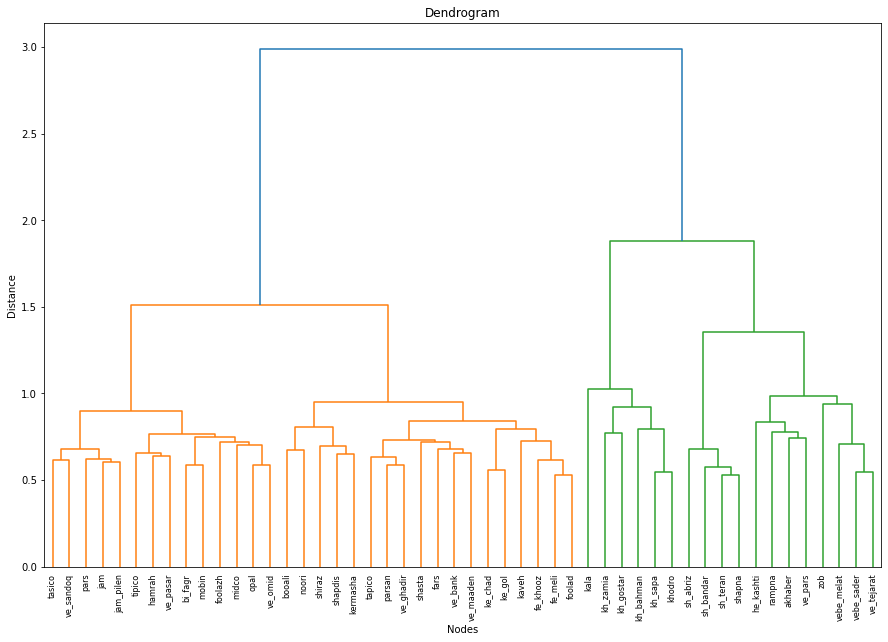

In [ ]:
ward(distance_matrix1)

In [ ]:

def ward_clustering(distance_matrix):
    # Perform hierarchical clustering using Ward's Method
    Z = linkage(distance_matrix, method='ward')

    return cut_tree(Z, n_clusters=7).reshape(-1)


In [ ]:
ward_clustering(distance_matrix1)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 3, 3, 3, 3, 3, 4, 0, 5, 5, 5, 2, 2,
       5, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 4, 4, 4, 1, 2, 2, 0,
       1, 6, 2, 2, 2, 2])

---

## <a id='toc15_3_'></a>[SOM](#toc0_)

In [ ]:
from minisom import MiniSom

def my_som(distance_matrix1):
    # Define SOM parameters
    map_size = (5, 5)  # Adjust the map size according to your preference
    input_len = distance_matrix1.shape[1]  # Number of features for each node
    sigma = 1  # Initial neighborhood radius
    learning_rate = 0.2  # Initial learning rate

    # Initialize and train the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(distance_matrix1)
    som.train_random(distance_matrix1, num_iteration=200)  # Adjust the number of iterations as needed

    # Get cluster labels for each node
    cluster_labels = som.labels_map(data=distance_matrix1,labels=EN_labels)

    # Print cluster labels
    for i,j in cluster_labels.items():
        print(list(j.keys()))

In [ ]:
my_som(distance_matrix1)

['akhaber']
['opal']
['bi_fagr', 'tipico', 'foolazh', 'midco', 've_pasar']
['booali', 'tapico', 'fe_khooz', 'noori', 've_ghadir', 'kaveh']
['tasico', 'jam', 'jam_pilen', 'mobin', 've_bank', 've_sandoq']
['he_kashti', 'vebe_sader', 'vebe_melat', 've_tejarat', 've_pars']
['kh_bahman', 'kh_zamia', 'kh_sapa', 'khodro', 'kh_gostar']
['zob']
['rampna']
['sh_abriz']
['sh_bandar', 'sh_teran', 'shapna']
['shasta']
['shapdis']
['pars']
['parsan']
['shiraz']
['fars', 'ke_chad', 'ke_gol']
['fe_meli']
['foolad']
['hamrah']
['ve_omid']
['ve_maaden']
['kala']
['kermasha']


In [ ]:
my_som(distance_matrix2)

['akhaber']
['opal', 'tasico', 'jam', 'jam_pilen', 'pars', 've_omid', 've_sandoq']
['bi_fagr', 'tipico', 'mobin']
['booali', 'shasta']
['tapico', 'parsan', 've_ghadir']
['he_kashti', 'kh_bahman', 'kh_zamia', 'kh_sapa', 'khodro', 'kh_gostar', 'kala']
['zob']
['rampna']
['sh_abriz', 'sh_bandar', 'sh_teran', 'shapna']
['shapdis']
['shiraz']
['fars', 've_maaden', 'ke_chad', 'ke_gol']
['fe_khooz', 'fe_meli', 'foolad']
['foolazh']
['midco']
['noori']
['hamrah']
['ve_bank']
['vebe_sader', 'vebe_melat', 've_tejarat', 've_pars']
['ve_pasar']
['kaveh']
['kermasha']


In [ ]:
my_som(distance_matrix3)

['akhaber', 'tapico', 'rampna']
['opal', 'booali', 'jam_pilen']
['bi_fagr', 'tasico', 'tipico', 'jam']
['he_kashti']
['kh_bahman', 'kh_zamia', 'kh_sapa', 'khodro', 'kh_gostar', 'zob']
['sh_abriz', 'sh_bandar', 'sh_teran']
['shasta']
['shapdis', 'shapna', 'vebe_sader']
['pars', 'parsan', 'fars', 'foolazh', 'mobin', 've_bank']
['shiraz']
['fe_khooz']
['fe_meli', 'foolad']
['midco', 've_omid']
['noori']
['hamrah']
['vebe_melat']
['ve_tejarat', 've_sandoq', 've_ghadir', 've_maaden', 've_pars', 've_pasar', 'kala', 'kaveh', 'kermasha', 'ke_chad', 'ke_gol']


In [ ]:
my_som(distance_matrix4)

['akhaber', 'he_kashti']
['opal', 'tasico', 'jam', 'pars', 'fars', 'mobin', 've_omid', 've_sandoq']
['bi_fagr', 'tipico', 'midco']
['booali', 'tapico', 'shapdis', 'parsan', 've_ghadir']
['jam_pilen', 'shiraz', 'noori', 'kermasha']
['kh_bahman', 'kh_zamia', 'kh_sapa', 'khodro', 'kh_gostar']
['zob']
['rampna']
['sh_abriz', 'sh_bandar', 'sh_teran', 'shapna']
['shasta']
['fe_khooz', 'fe_meli', 'foolad', 've_maaden', 'ke_chad', 'ke_gol']
['foolazh']
['hamrah', 've_pasar']
['ve_bank']
['vebe_sader', 'vebe_melat', 've_tejarat']
['ve_pars']
['kala']
['kaveh']


In [ ]:
def SOM_clusterin(adjacency_matrix):
    # Define SOM parameters
    map_size = (5, 5)  # Adjust the map size according to your preference
    input_len = adjacency_matrix.shape[1]  # Number of features for each node
    sigma = 1  # Initial neighborhood radius
    learning_rate = 0.2  # Initial learning rate

    # Initialize and train the SOM
    som = MiniSom(map_size[0], map_size[1], input_len, sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(adjacency_matrix)
    som.train_random(adjacency_matrix, num_iteration=200)  # Adjust the number of iterations as needed

    # Get cluster labels for each node
    cluster_labels = som.labels_map(data=adjacency_matrix,labels=list(range(50)))

    # Print cluster labels
    labelss = [0 for _ in range(50)]

    for index,(i,j) in enumerate( cluster_labels.items()):
        for k in list(j.keys()):
            labelss[k] = index
        # break
    return np.array(labelss)

In [ ]:
SOM_clusterin(adj_matrix1)

array([ 0,  1,  2,  3,  4,  5,  2,  6,  7,  8,  8,  8,  8,  8,  8,  9,  0,
       10, 11, 11, 12, 13, 14, 15, 13,  2, 16, 17, 13, 18, 19, 20,  2, 11,
        2,  2, 18, 14,  9, 21, 22, 18, 18, 23, 19,  8, 19, 12, 18,  1])

---
## <a id='toc15_4_'></a>[Mini Batch KMeans](#toc0_)

In [ ]:
from sklearn.cluster import MiniBatchKMeans


def mini_KM(symmetric_difference_matrix):
    k = 7 # Number of clusters
    batch_size = 10  # Number of samples per batch
    max_iter = 400  # Maximum number of iterations

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter)
    cluster_labels = mini_batch_kmeans.fit_predict(symmetric_difference_matrix)

    for  i in range(k):
        # print(f"Node {node}: Cluster {cluster_label}")
        cluster_points = np.where(cluster_labels == i)
        print(f"Cluster {i+1}:")
        print(f"Data points: {EN_labels[cluster_points]}")
        print()


In [ ]:
mini_KM(distance_matrix1)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Cluster 1:
Data points: ['he_kashti' 'vebe_sader' 'vebe_melat' 've_tejarat' 've_pars']

Cluster 2:
Data points: ['akhaber' 'opal' 'bi_fagr' 'tasico' 'tipico' 'jam' 'rampna' 'pars'
 'shiraz' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 've_sandoq'
 've_pasar' 'kermasha']

Cluster 3:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapna']

Cluster 4:
Data points: ['kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'zob' 'kala']

Cluster 5:
Data points: ['jam_pilen']

Cluster 6:
Data points: ['booali']

Cluster 7:
Data points: ['tapico' 'shasta' 'shapdis' 'parsan' 'fars' 'fe_khooz' 'fe_meli' 'foolad'
 'noori' 've_bank' 've_ghadir' 've_maaden' 'kaveh' 'ke_chad' 'ke_gol']



In [ ]:
mini_KM(distance_matrix2)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Cluster 1:
Data points: ['bi_fagr' 'booali' 'tasico' 'tipico' 'jam' 'jam_pilen' 'rampna' 'shasta'
 'pars' 'shiraz' 'fars' 'foolazh' 'mobin' 'midco' 'noori' 'hamrah'
 've_omid' 've_bank' 've_sandoq' 've_pasar' 'kermasha']

Cluster 2:
Data points: ['akhaber' 'vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 3:
Data points: ['tapico' 'shapdis' 'parsan' 'fe_khooz' 'fe_meli' 'foolad' 've_ghadir'
 've_maaden' 'kaveh' 'ke_chad' 'ke_gol']

Cluster 4:
Data points: ['sh_abriz' 'sh_teran' 'shapna']

Cluster 5:
Data points: ['sh_bandar']

Cluster 6:
Data points: ['opal']

Cluster 7:
Data points: ['he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'zob'
 've_pars' 'kala']



In [ ]:
mini_KM(distance_matrix3)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Cluster 1:
Data points: ['he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'zob'
 'rampna' 'sh_abriz' 'sh_bandar' 'sh_teran']

Cluster 2:
Data points: ['ve_tejarat' 've_sandoq' 've_ghadir' 've_maaden' 've_pars' 've_pasar'
 'kala' 'kaveh' 'kermasha' 'ke_chad' 'ke_gol']

Cluster 3:
Data points: ['noori']

Cluster 4:
Data points: []

Cluster 5:
Data points: ['opal' 'bi_fagr' 'booali' 'tasico' 'tipico' 'jam' 'jam_pilen' 'shasta']

Cluster 6:
Data points: ['akhaber']

Cluster 7:
Data points: ['tapico' 'shapdis' 'shapna' 'pars' 'parsan' 'shiraz' 'fars' 'fe_khooz'
 'fe_meli' 'foolad' 'foolazh' 'mobin' 'midco' 'hamrah' 've_omid' 've_bank'
 'vebe_sader' 'vebe_melat']



In [ ]:
mini_KM(distance_matrix4)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Cluster 1:
Data points: ['tapico' 'parsan' 'fe_khooz' 'fe_meli' 'foolad' 've_ghadir' 've_maaden'
 'ke_chad' 'ke_gol']

Cluster 2:
Data points: ['vebe_sader' 'vebe_melat' 've_tejarat']

Cluster 3:
Data points: ['bi_fagr' 'tipico' 'jam_pilen' 'shasta' 'foolazh' 'midco' 'hamrah'
 've_bank' 've_pasar']

Cluster 4:
Data points: ['he_kashti' 'kh_bahman' 'kh_zamia' 'kh_sapa' 'khodro' 'kh_gostar' 'kala']

Cluster 5:
Data points: ['akhaber' 'zob' 'rampna' 've_pars']

Cluster 6:
Data points: ['sh_abriz' 'sh_bandar' 'sh_teran' 'shapdis' 'shapna' 'shiraz' 'noori'
 'kaveh' 'kermasha']

Cluster 7:
Data points: ['opal' 'booali' 'tasico' 'jam' 'pars' 'fars' 'mobin' 've_omid'
 've_sandoq']



In [ ]:
def mini_KMeans(symmetric_difference_matrix):
    k = 7 # Number of clusters
    batch_size = 10  # Number of samples per batch
    max_iter = 400  # Maximum number of iterations

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, max_iter=max_iter)
    cluster_labels = mini_batch_kmeans.fit_predict(symmetric_difference_matrix)

    return cluster_labels

----
---

# Votting

In [ ]:
def chunk_to_clusters(arr):
    num_cluster = max(arr) + 1
    clusters = []
    for i in range(num_cluster):
        a = np.where(arr == i)[0]
        clusters.append(list(a))

    return clusters


# convert adjacency(similarity) matrix to distance matrix
def adj_to_distance(adj_mat):
    dist_mat = np.exp(-adj_mat)
    np.fill_diagonal(dist_mat,0)
    return dist_mat


# convert distance matrix to adjacency(similarity) matrix
def distance_to_adj(dist_mat):
    adj_mat = np.exp(-dist_mat)
    np.fill_diagonal(adj_mat,1)
    return adj_mat


The following function performs clustering using different algorithms on a dataset :

In [ ]:
def create_clusters(dist_mat):
    all_clustering = []
    all_clustering.append(chunk_to_clusters(Hierarchical_clustering(dist_mat)))
    all_clustering.append(chunk_to_clusters(Agglomerative_clustering(dist_mat)))
    all_clustering.append(chunk_to_clusters(OPTICS_clustering(dist_mat)))
    all_clustering.append(chunk_to_clusters(kmeans(dist_mat)))
    all_clustering.append(chunk_to_clusters(Meanshift_cls(dist_mat)))
    all_clustering.append(chunk_to_clusters(Spectral_Clustering(distance_to_adj(dist_mat))))
    all_clustering.append(chunk_to_clusters(Affinity_Propagation(distance_to_adj(dist_mat))))
    all_clustering.append(chunk_to_clusters(Birch_clustering(distance_to_adj(dist_mat))))
    # all_clustering.append(chunk_to_clusters(GMM_clustering(dist_mat)))    # not perfect
    all_clustering.append(chunk_to_clusters(ward_clustering(dist_mat)))
    all_clustering.append(chunk_to_clusters(SOM_clusterin(dist_mat)))
    all_clustering.append(chunk_to_clusters(mini_KMeans(dist_mat)))

    return all_clustering


Now, we regenerate adjacency matrix According to result of different clustering algorithms on the dataset :

In [ ]:
from re import X
from itertools import permutations

def create_permutations(lst):
    # Generate permutations of length 2
    perm = permutations(lst, 2)

    # Print each permutation, excluding duplicates
    x = []
    for p in perm:
        if set(p) not in x:
          x.append(set(p))
        #   print(p)
    return x

In [ ]:
# Example usage
my_list = [1, 2, 3, 4]
per = create_permutations(my_list)
per

[{1, 2}, {1, 3}, {1, 4}, {2, 3}, {2, 4}, {3, 4}]

In [ ]:
def votter(clusters_list,num_node):
    my_dict = {}
    for pair in create_permutations(list(range(num_node))):
        pair = tuple(pair)
        counter = 0
        for clusters in clusters_list:
            is_neighbor = False
            for cluster in clusters:
                if (pair[0] in cluster) and  (pair[1] in cluster):
                    is_neighbor = True

            if is_neighbor:
                counter += 1


        my_dict[pair] = counter

    return my_dict

The output of the above function is a Python dictionary, each item of which is as follows:

$dict[(i,j)] : n$

And its meaning is that node $i$ and node $j$, in $n$ clustering algorithm, are placed in same cluster.

In [ ]:
cluster_list = [[[0,1,2],[3,4]],
                [[0,2],[1,3,4]],
                [[0,1,4],[2,3]],
                [[0,1,2,3,4],]
                ]

votter(cluster_list,5)

{(0, 1): 3,
 (0, 2): 3,
 (0, 3): 1,
 (0, 4): 2,
 (1, 2): 2,
 (1, 3): 2,
 (1, 4): 3,
 (2, 3): 2,
 (2, 4): 1,
 (3, 4): 3}

Regenerate adjacency matrix :

$$NewAdjMatrix[i,j] = dict[(i,j)] \quad\quad i,j = 1,...,n$$


In [ ]:
def regenerate_adj_matrix(dist_mat):
    my_dict = votter(create_clusters(dist_mat),50)
    adj_mat = np.zeros((50,50))
    for pair,count in my_dict.items():
        adj_mat[pair[0],pair[1]] = adj_mat[pair[1],pair[0]] = count
        # adj_mat = adj_mat#/adj_mat.max()
        np.fill_diagonal(adj_mat,adj_mat.max())
    return adj_mat


In [ ]:
weight_vec = np.array([2,4,1,4]) + 1   # weight vector.  (for combine result of different datasets)

In [ ]:
def create_weighted_dist(weight_vec):
    """
    This function generate the adj matrix, which is the weighted sum of the adjacency matrices obtained from different datasets (distance matrices).
    """
    new_adj1 = regenerate_adj_matrix(distance_matrix1)
    new_adj2 = regenerate_adj_matrix(distance_matrix2)
    new_adj3 = regenerate_adj_matrix(distance_matrix3)
    new_adj4 = regenerate_adj_matrix(distance_matrix4)

    new_summed_adj = weight_vec[0]*new_adj1 + weight_vec[1]*new_adj2 + weight_vec[2]*new_adj3 + weight_vec[3]*new_adj3
    new_summed_adj2 = new_summed_adj/new_summed_adj.max()
    newdist = adj_to_distance(new_summed_adj2)  # convert adj matrix to distance matrix
    return newdist

$$distance\; matrix 1  \rightarrow NewAdjMatrix1 $$
$$distance\; matrix 2  \rightarrow NewAdjMatrix2 $$
$$distance\; matrix 3  \rightarrow NewAdjMatrix3 $$
$$distance\; matrix 4  \rightarrow NewAdjMatrix4 $$


$$NewAdjMatrix = weight[0]\times NewAdjMatrix1 + weight[1]\times NewAdjMatrix2 + weight[2]\times NewAdjMatrix3 + weight[3]\times NewAdjMatrix4 $$


$$NewAdjMatrix = \frac{NewAdjMatrix}{max(NewAdjMatrix)} \quad\quad \text{(element-wise normalization)}$$       

# <img src="./pic/1.png" width="1200"/>

Now we do the clustering using the new adjacency matrix :

In [ ]:
newdist = create_weighted_dist(weight_vec)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (7). Decrease the threshold.
  ConvergenceWarning,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  
/home/amir/anaconda3/envs/py

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


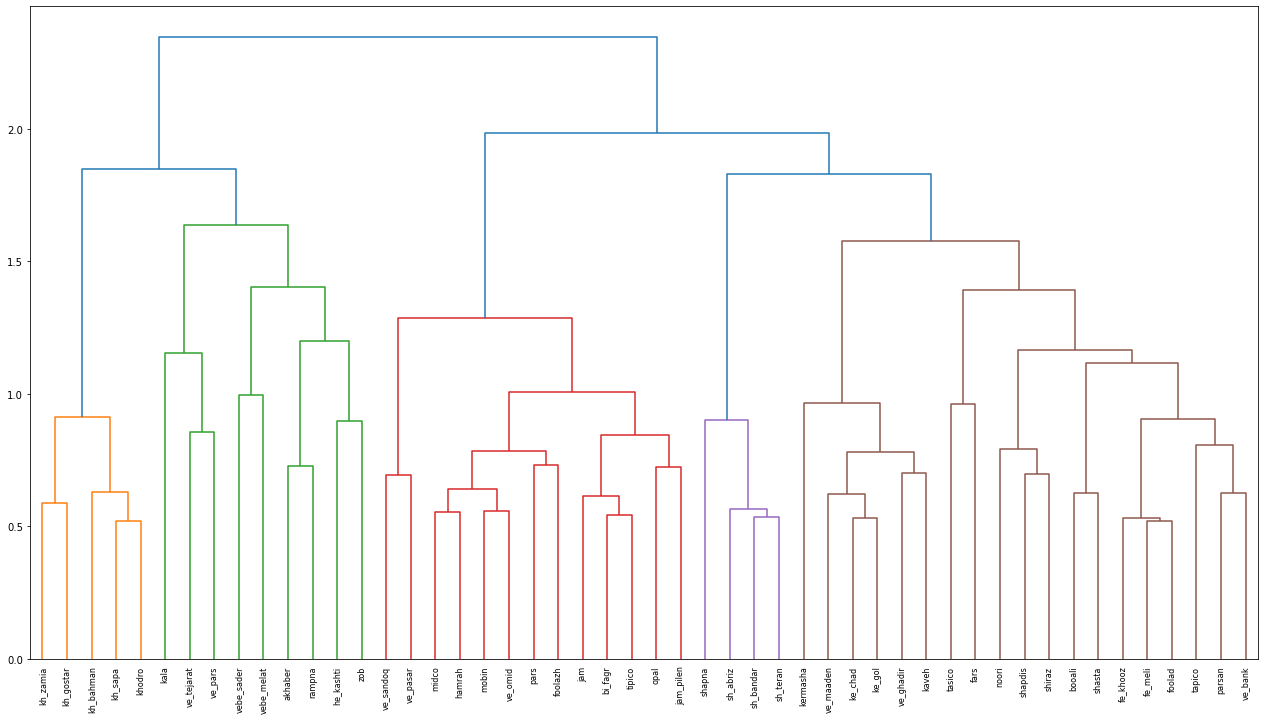

In [ ]:
Z = linkage(newdist, method='complete')
plt.figure(figsize=(22,12))
# Generate dendrogram
dendrogram(Z,labels=EN_labels)

# Display the plot
plt.show();

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


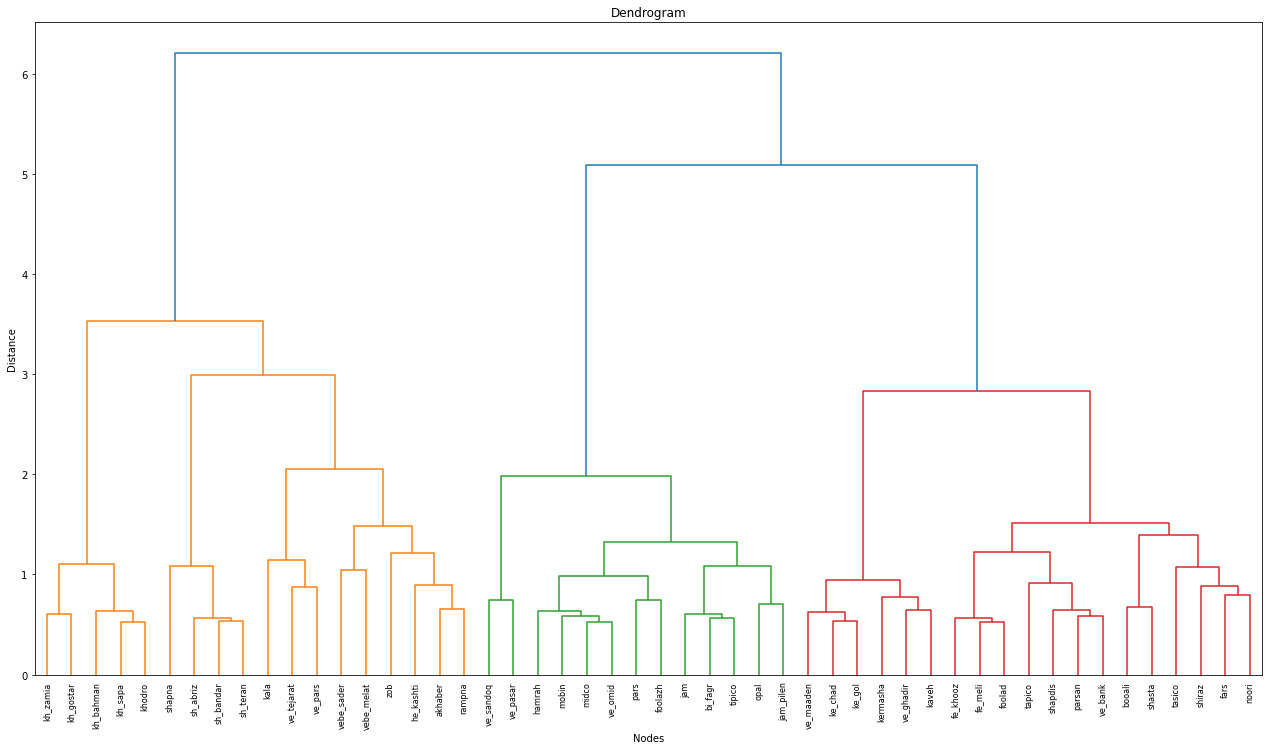

In [ ]:
ward(newdist)

In [ ]:
kmeans(newdist)

array([2, 3, 3, 4, 3, 4, 3, 3, 3, 2, 0, 0, 0, 0, 0, 2, 2, 6, 6, 6, 4, 4,
       6, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 2, 2, 5, 1, 1, 1, 5,
       1, 5, 1, 1, 1, 1], dtype=int32)

---
---

### Repeat Algorithm

# <img src="./pic/2.png" width="1200"/>

In [ ]:
new_adj7 = regenerate_adj_matrix(newdist)
new_summed_adj7 = new_adj7/new_adj7.max()
newdist7 = adj_to_distance(new_summed_adj7)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (7). Decrease the threshold.
  ConvergenceWarning,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


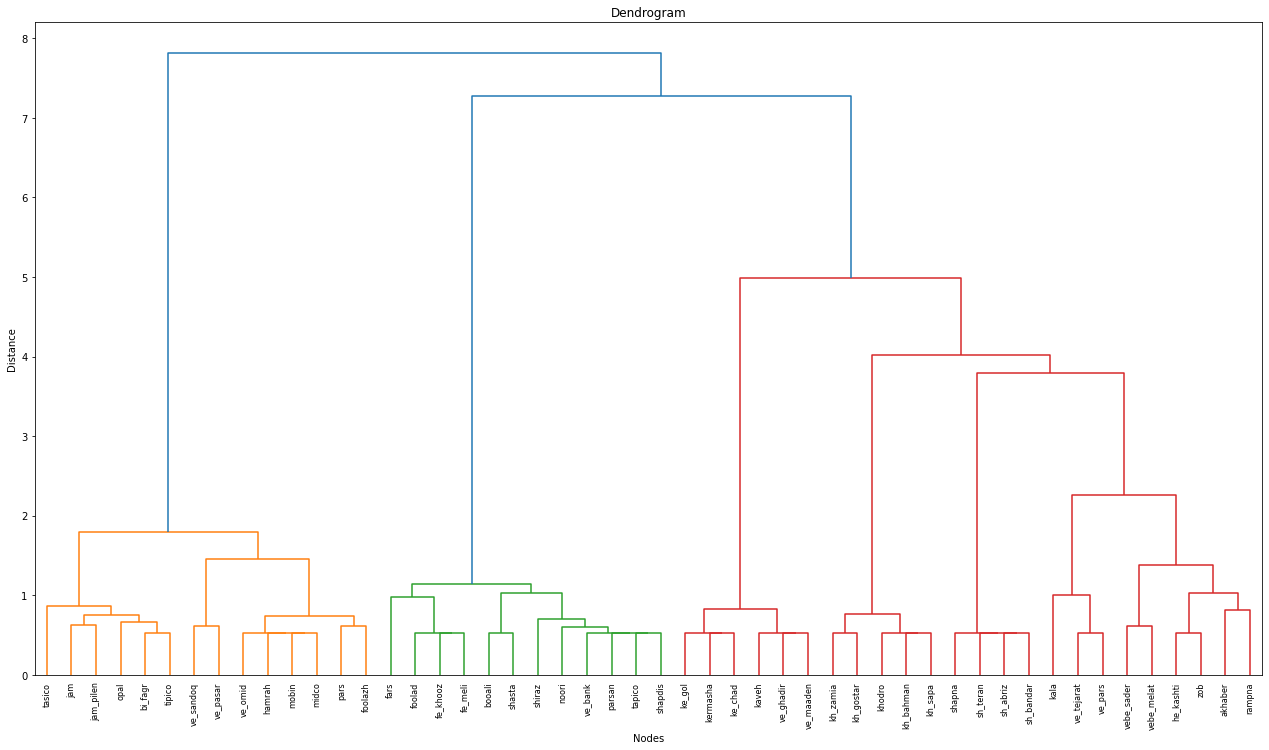

In [ ]:
ward(newdist7)

---
---
## Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_clusters(clusters,labels,dataset):
    for index,cluster in enumerate(clusters):
        names = []
        plt.figure(figsize=(18,3))
        plt.title(f'Cluster {index+1}')
        for stock in cluster:
            plt.plot(dataset[f'stock {stock+1}']);
            names.append(labels[stock])
        plt.ylabel('Normalaized Close Price')
        plt.xlabel('day')
        plt.legend(names)


In [ ]:
def convert_arr_to_cluster(arr):
    cls= []
    n_cluster = max(arr+1)
    for i in range(n_cluster):
        cls.append(list(np.where(arr == i)[0]))
    return cls

Load time series data :

In [ ]:
My_Dataset2 = pd.read_excel('Iran_time_series.xlsx')
My_Dataset2.index = My_Dataset2['Date']
My_Dataset2 = My_Dataset2[4820:].drop('Date',axis=1)
My_Dataset2.columns = [f'stock {i+1}' for i in range(50)]
names = list(range(My_Dataset2.shape[0]))
# names[0] = 'Date'

My_Dataset2.index = names

In [ ]:
My_Dataset2

,stock 1,stock 2,stock 3,stock 4,stock 5,stock 6,stock 7,stock 8,stock 9,stock 10,...,stock 41,stock 42,stock 43,stock 44,stock 45,stock 46,stock 47,stock 48,stock 49,stock 50
0,9560.0,13811.0,4996.0,7411.0,3605.0,5635.0,12925.0,20497.0,44324.0,6494.0,...,5711.0,7915.0,2931.0,3150.0,2292.0,6342.0,6844.0,8710.0,3193.0,3682.0
1,9427.0,13576.0,4992.0,7408.0,3651.0,5731.0,12767.0,20941.0,44623.0,6488.0,...,5646.0,8266.0,2978.0,3090.0,2298.0,6334.0,7042.0,8735.0,3205.0,3705.0
2,9276.0,13924.0,4992.0,7482.0,3829.0,6012.0,12905.0,22140.0,47281.0,6436.0,...,5642.0,8691.0,3150.0,3040.0,2318.0,6322.0,7328.0,8828.0,3248.0,3800.0
3,9390.0,13924.0,4992.0,7473.0,4010.0,6028.0,12896.0,22726.0,48562.0,6342.0,...,5642.0,8825.0,3199.0,3010.0,2367.0,6303.0,7317.0,9036.0,3276.0,3825.0
4,9238.0,13958.0,5001.0,7426.0,4107.0,6049.0,12876.0,22976.0,49532.0,6329.0,...,5621.0,8847.0,3210.0,2950.0,2369.0,6291.0,7233.0,9064.0,3355.0,3858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,9660.0,13650.0,18110.0,49930.0,8810.0,16230.0,34970.0,43960.0,182790.0,13820.0,...,15460.0,20990.0,4849.0,1862.0,2609.0,10950.0,11080.0,21430.0,5970.0,6250.0
591,10250.0,13640.0,18140.0,49880.0,8810.0,16430.0,34790.0,44030.0,183220.0,13750.0,...,15640.0,20990.0,4890.0,1885.0,2623.0,10940.0,11100.0,21260.0,5990.0,6260.0
592,10340.0,13620.0,18160.0,50180.0,8810.0,16650.0,34720.0,44080.0,183440.0,13470.0,...,15700.0,21020.0,4872.0,1877.0,2625.0,10720.0,11150.0,21350.0,5990.0,6260.0
593,10330.0,13610.0,18250.0,51300.0,8810.0,17230.0,34670.0,44100.0,184290.0,13310.0,...,15750.0,21010.0,4872.0,1875.0,2631.0,10790.0,11150.0,21350.0,5980.0,6260.0


In [ ]:
EN_labels = np.load('EN_stock.npy')
EN_labels

array(['akhaber', 'opal', 'bi_fagr', 'booali', 'tasico', 'tapico',
       'tipico', 'jam', 'jam_pilen', 'he_kashti', 'kh_bahman', 'kh_zamia',
       'kh_sapa', 'khodro', 'kh_gostar', 'zob', 'rampna', 'sh_abriz',
       'sh_bandar', 'sh_teran', 'shasta', 'shapdis', 'shapna', 'pars',
       'parsan', 'shiraz', 'fars', 'fe_khooz', 'fe_meli', 'foolad',
       'foolazh', 'mobin', 'midco', 'noori', 'hamrah', 've_omid',
       've_bank', 'vebe_sader', 'vebe_melat', 've_tejarat', 've_sandoq',
       've_ghadir', 've_maaden', 've_pars', 've_pasar', 'kala', 'kaveh',
       'kermasha', 'ke_chad', 'ke_gol'], dtype='<U10')

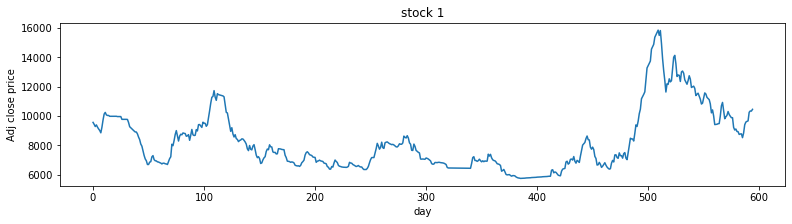

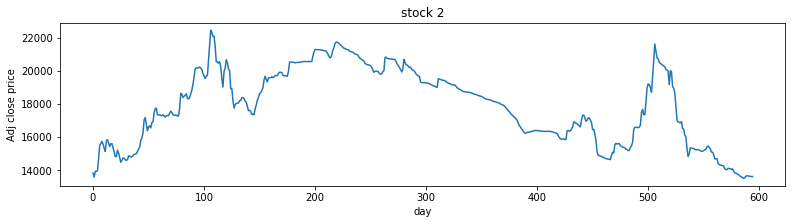

In [ ]:
plt.figure(figsize=(13,3))
plt.plot(My_Dataset2['stock 1']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 1')

plt.figure(figsize=(13,3))
plt.plot(My_Dataset2['stock 2']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 2');

### Data Normalization

In [ ]:
for col in My_Dataset2.columns:
    My_Dataset2[col] = (My_Dataset2[col] - My_Dataset2[col].mean()) / My_Dataset2[col].max()

# Print the updated DataFrame
My_Dataset2.head()

,stock 1,stock 2,stock 3,stock 4,stock 5,stock 6,stock 7,stock 8,stock 9,stock 10,...,stock 41,stock 42,stock 43,stock 44,stock 45,stock 46,stock 47,stock 48,stock 49,stock 50
0,0.083599,-0.182211,-0.284983,-0.292866,-0.146221,-0.230859,-0.211545,-0.255728,-0.353122,-0.080779,...,-0.225023,-0.226716,-0.235632,0.296534,-0.156450,-0.212959,-0.015613,-0.261687,-0.259468,-0.293024
1,0.075206,-0.192680,-0.285146,-0.292922,-0.141560,-0.225753,-0.215945,-0.248274,-0.351549,-0.081079,...,-0.227990,-0.213929,-0.228912,0.278757,-0.154779,-0.213394,-0.000118,-0.260758,-0.257906,-0.290123
2,0.065677,-0.177177,-0.285146,-0.291546,-0.123526,-0.210806,-0.212102,-0.228145,-0.337572,-0.083673,...,-0.228172,-0.198446,-0.204320,0.263942,-0.149211,-0.214047,0.022264,-0.257302,-0.252307,-0.278141
3,0.072871,-0.177177,-0.285146,-0.291713,-0.105187,-0.209955,-0.212353,-0.218307,-0.330835,-0.088364,...,-0.228172,-0.193565,-0.197314,0.255053,-0.135570,-0.215081,0.021403,-0.249572,-0.248661,-0.274988
4,0.063279,-0.175663,-0.284779,-0.292587,-0.095360,-0.208838,-0.212910,-0.214110,-0.325734,-0.089013,...,-0.229131,-0.192763,-0.195741,0.237275,-0.135013,-0.215734,0.014830,-0.248531,-0.238375,-0.270827


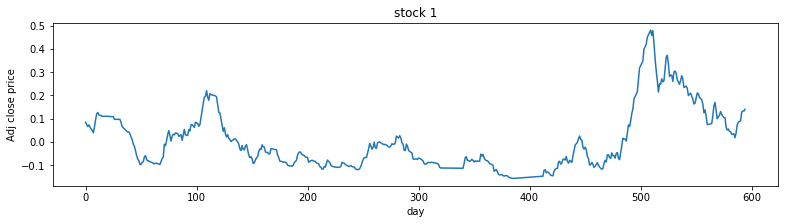

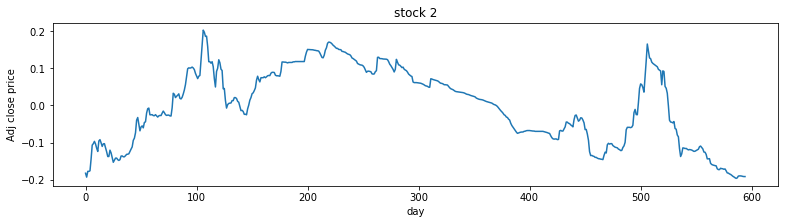

In [ ]:
plt.figure(figsize=(13,3))
plt.plot(My_Dataset2['stock 1']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 1');

plt.figure(figsize=(13,3))
plt.plot(My_Dataset2['stock 2']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 2');

----

## One-Step result

In [ ]:
clusters = kmeans(newdist)


In [ ]:
convert_arr_to_cluster(clusters)

[[1, 2, 4, 6, 7, 8, 23, 30, 31, 32, 34, 35, 40, 44],
 [39, 43, 45],
 [3, 5, 20, 21, 24, 25, 26, 27, 28, 29, 33, 36],
 [0, 9, 15, 16, 37, 38],
 [10, 11, 12, 13, 14],
 [17, 18, 19, 22],
 [41, 42, 46, 47, 48, 49]]

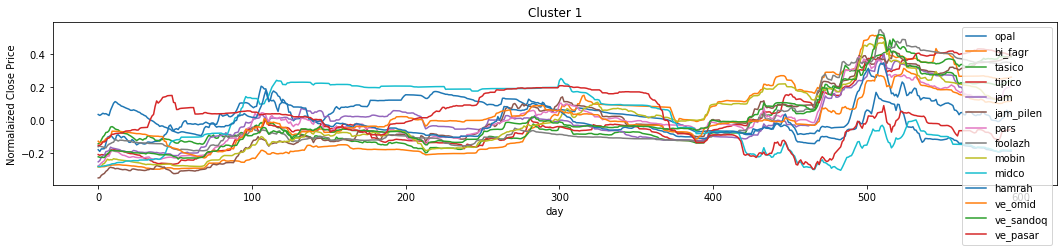

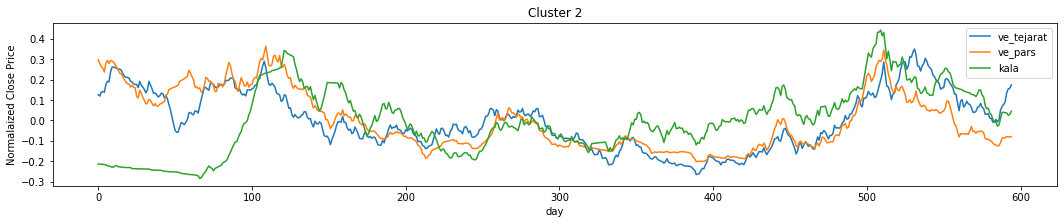

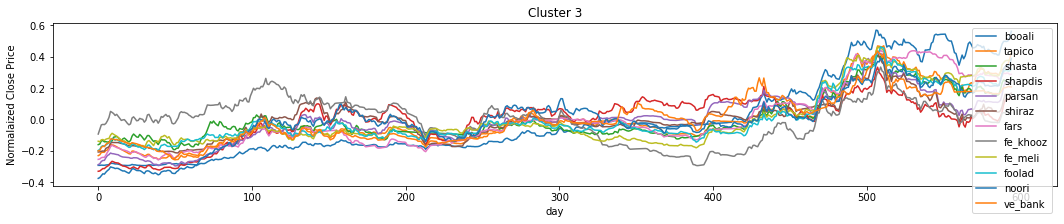

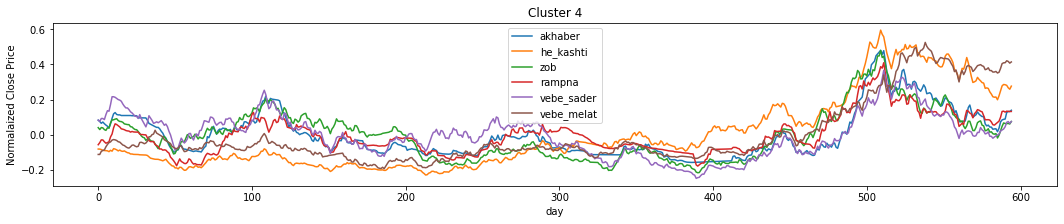

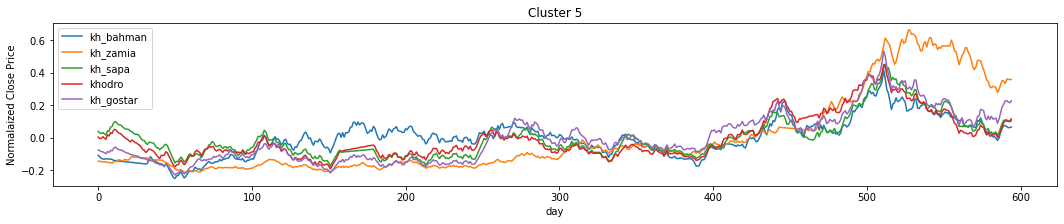

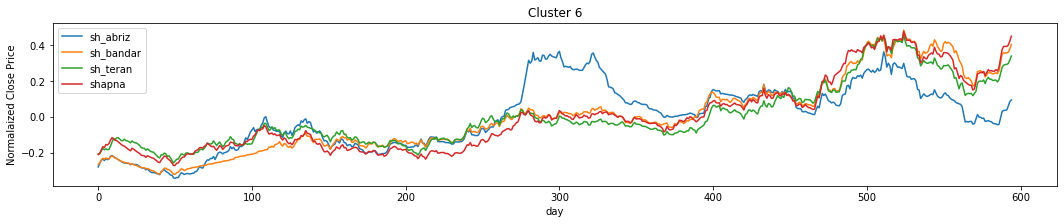

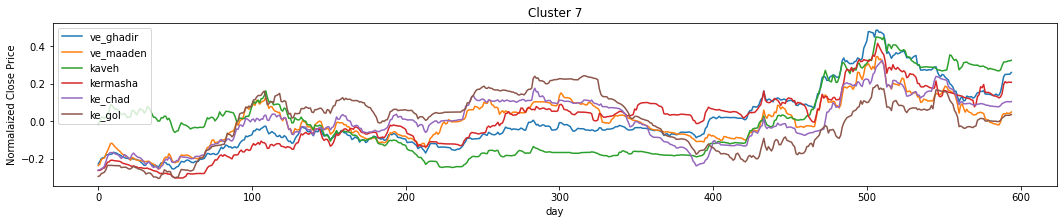

In [ ]:
plot_clusters(convert_arr_to_cluster(clusters),EN_labels,My_Dataset2)

## Two-Step result

In [ ]:
clusters = kmeans(newdist7)


In [ ]:
convert_arr_to_cluster(clusters)

[[1, 2, 4, 6, 7, 8, 23, 30, 31, 32, 34, 35, 40, 44],
 [3, 5, 20, 21, 24, 25, 26, 27, 28, 29, 33, 36],
 [39, 43, 45],
 [41, 42, 46, 47, 48, 49],
 [10, 11, 12, 13, 14],
 [0, 9, 15, 16, 37, 38],
 [17, 18, 19, 22]]

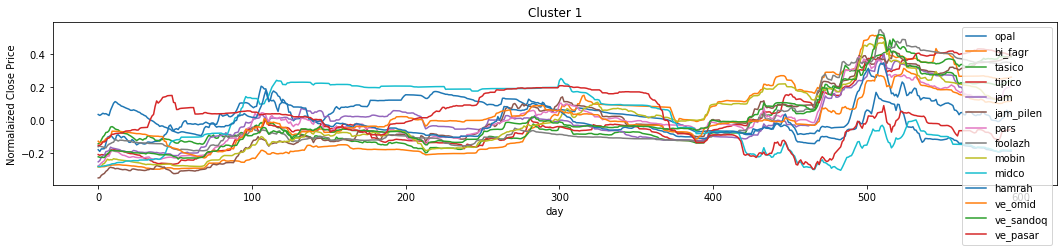

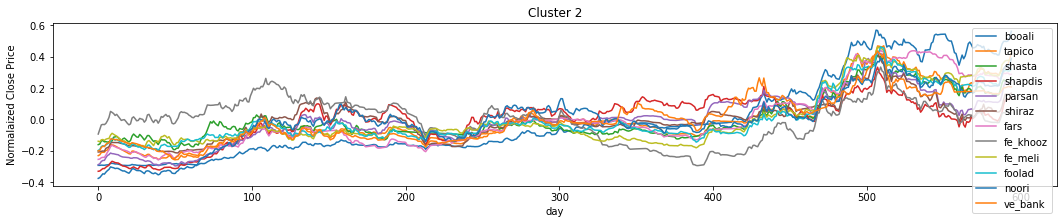

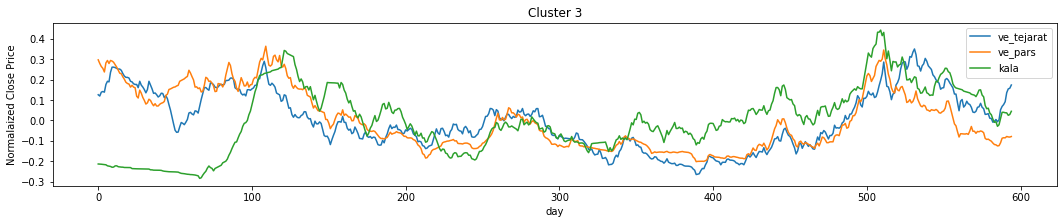

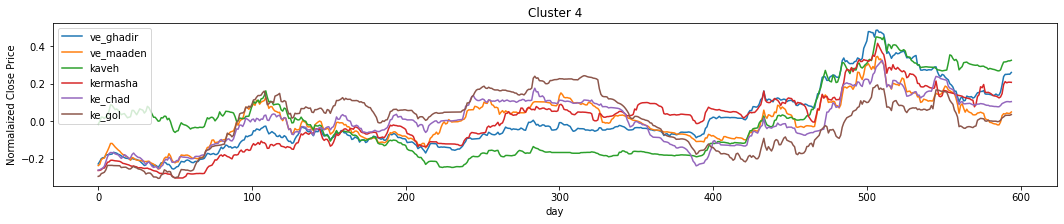

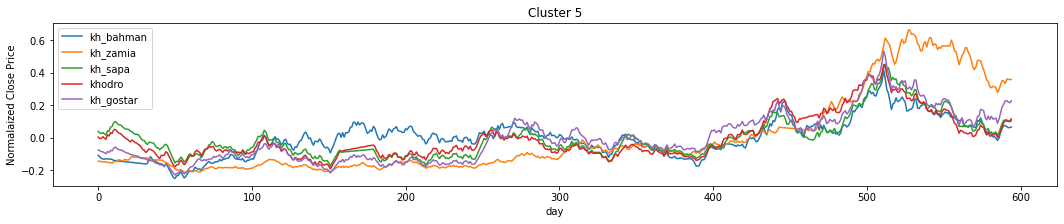

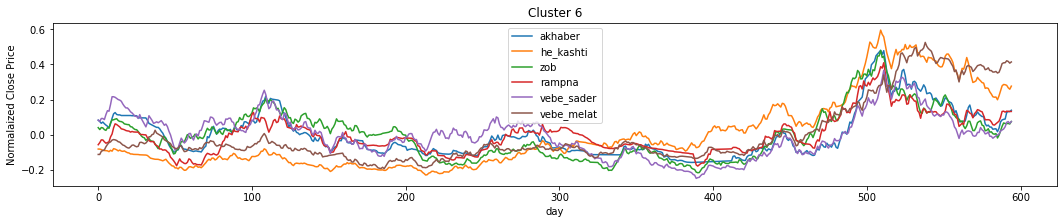

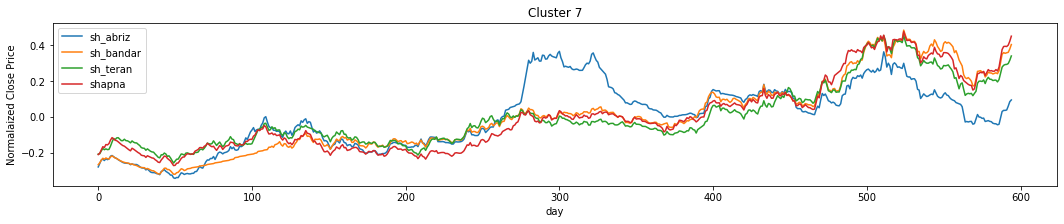

In [ ]:
plot_clusters(convert_arr_to_cluster(clusters),EN_labels,My_Dataset2)